# Bernstein-Yang Modular Inversion with XLS/OpenLane

```
Copyright 2022 Anawin Opasatian
License: Apache-2.0
```

This notebook present the design of modular inversion module based on Bernstein-Yang algorithm aimed to be a basis for future works. This work involves [XLS](https://github.com/google/xls), [OpenLane](https://github.com/The-OpenROAD-Project/OpenLane/), [SKY130 PDK](https://github.com/google/skywater-pdk/) and many more open source tools.

# Author

Anawin Opasatian - PhD student (Ikeda Lab) at The University of Tokyo

---

# Installing Dependencies

In [1]:
import os
import pathlib
import sys

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
CONDA_PREFIX = str(conda_prefix_path.resolve())
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
%env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        open_pdks.sky130a \
                        magic \
                        openroad \
                        netgen \
                        yosys \
                        xls \
                        iverilog
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel conda-forge \
                        tcllib gdstk pyyaml click cairosvg

bin/micromamba
env: CONDA_PREFIX=/content/conda-env
env: PATH=/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
env: LD_LIBRARY_PATH=/content/conda-env/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

Empty environment created at prefix: /content/conda-env

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

[+] 0.0s
litex-hub/linux-64  ⣾  
litex-hub/noarch    ⣾  
main/l

In [2]:
!curl -L -O https://github.com/google/xls/archive/refs/heads/main.tar.gz
!tar --strip-components=1 -xvf main.tar.gz xls-main/xls/dslx/stdlib/ xls-main/xls/modules/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 15.6M    0 15.6M    0     0  8876k      0 --:--:--  0:00:01 --:--:-- 10.3M
xls-main/xls/dslx/stdlib/
xls-main/xls/dslx/stdlib/BUILD
xls-main/xls/dslx/stdlib/acm_random.x
xls-main/xls/dslx/stdlib/apfloat.x
xls-main/xls/dslx/stdlib/bfloat16.x
xls-main/xls/dslx/stdlib/float32.x
xls-main/xls/dslx/stdlib/float32_test.cc
xls-main/xls/dslx/stdlib/float64.x
xls-main/xls/dslx/stdlib/std.x
xls-main/xls/modules/
xls-main/xls/modules/aes/
xls-main/xls/modules/aes/BUILD
xls-main/xls/modules/aes/aes.x
xls-main/xls/modules/aes/aes_common.x
xls-main/xls/modules/aes/aes_ctr.x
xls-main/xls/modules/aes/aes_ctr_test.cc
xls-main/xls/modules/aes/aes_gcm.x
xls-main/xls/modules/aes/aes_gcm_test.cc
xls-main/xls/modules/aes/aes_test.cc
xls-main/xls/modules/aes/aes_test_commo

In [3]:
!git clone --depth=1 https://github.com/The-OpenROAD-Project/OpenLane

Cloning into 'OpenLane'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (553/553), done.
remote: Compressing objects: 100% (475/475), done.
remote: Total 553 (delta 77), reused 306 (delta 27), pack-reused 0
Receiving objects: 100% (553/553), 9.76 MiB | 25.83 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [4]:
OPENLANE_ROOT=str(pathlib.Path('OpenLane').resolve())
PATH=os.environ['PATH']
%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env TCLLIBPATH={CONDA_PREFIX}/lib/tcllib1.20
%env OPENLANE_ROOT={OPENLANE_ROOT}
%env PATH={PATH}:{OPENLANE_ROOT}:{OPENLANE_ROOT}/scripts
%env OPENLANE_LOCAL_INSTALL=1

env: PDK_ROOT=/content/conda-env/share/pdk
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: TCLLIBPATH=/content/conda-env/lib/tcllib1.20
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts
env: OPENLANE_LOCAL_INSTALL=1


In [5]:
import pandas as pd
import random
import math
import gdstk
import PIL
import cairosvg
from google.colab import files

---
# 1. Introduction

## 1.1. Short Introduction

Modular inversion is used in many cryptographic computations. A good example is the now popular scalar multiplication in ECC (Elliptic Curve Cryptography). So, the modular inversion module based on the Bernstein-Yang modular inversion algorithm is implemented in the hope of being integrated into future cryptographic accelerator implementations.

Thus this work is submitted to category 2: A new idea that could be the basis for future tapeout.

In this work:

* The modular inversion module is (manually) implemented with Skywater 130 nm PDK.
* Another implementation is made with a part of the module partly auto-generated by XLS.
* The comparison between the two implementations is made.

While normally the primes used in ECC are usually much higher in the number of bits, the main part of this notebook will be implemented with a 23-bit prime (4,206,593) for ease of implementation. However, all modules are parameterized to be usable in any prime, so an increment in the prime's bit size will not pose any problem.

## 1.2. Long Introduction

Many cryptography algorithms heavily involve modular arithmetic. From [RSA](https://en.wikipedia.org/wiki/RSA_(cryptosystem)) to the now popular Elliptic Curve Cryptography ([ECC](https://en.wikipedia.org/wiki/Elliptic-curve_cryptography)) and also some of the post-quantum cryptography candidates (e.x. [SIKE](https://eprint.iacr.org/2019/1321.pdf), [NTRU](https://www.ntru.org/f/hps98.pdf)). While not all require modular inversion, many still require modular inversion. In some cases, the latency of modular inversion affects the overall latency.

The scalar multiplication in ECC is an example of where the modular inversion computation impacts the latency. Usually, Fermat's Little Theorem (FLT) is used to compute the modular inversion. With $a^{p} \equiv a \mod p$, we can have $a \cdot a^{p-2} \equiv 1 \mod p$, meaning that $a^{-1} \mod p = a^{p-2} \mod p$.

The modular inversion computed with FLT is easily implemented, as only the repetition of modular multiplication is needed. The computation can also be executed in constant time, a crucial property for algorithms in cryptography applications.

The problem with FLT is that the computation latency is quite long, especially for large bit-sized primes. A [Generic ECC Accelerator](https://www.mdpi.com/1424-8220/21/4/1451) presented in 2021 by A. Awaludin, H. Larasati, and H. Kim can compute the scalar multiplication in the 256-bit Weierstrass curve in 32,272 cycles. Of the total number of cycles, 6,911 cycles are used to compute modular inversion using the FLT algorithm. It can be seen that the modular inversion computation latency takes up to 21.4% of the total latency.

Of course, the FLT incur no area overhead because most of the ECC accelerator already have the modular multiplier module. However, the area tradeoff for faster modular inversion computation is a justifiable choice to improve the overall latency.

The extended Euclidean algorithm ([EEA](https://en.wikipedia.org/wiki/Extended_Euclidean_algorithm)) is another popular algorithm for computing modular inversion. Currently, the [variation of EEA presented in 2019 by Bernstein and Yang](https://tches.iacr.org/index.php/TCHES/article/view/8298) is a popular way to compute modular inversion as many software now adopt this algorithm to be used in their computation, e.g. [MirageOS unikernel](https://eprint.iacr.org/2021/549), [RELIC cryptographic-toolkit](https://github.com/relic-toolkit/relic), and [Bitcoin's signature operation](https://github.com/bitcoin-core/secp256k1).

Thus, the Bernstein-Yang modular inversion module is implemented using the Skywater 130 nm PDK. The modular inversion module itself is not a complex design, so another implementation with some parts auto-generated by XLS is also implemented. Then, the comparison between the two implementations is given.

Note that while the design is originally aimed for an ECC accelerator, the prime bit size in ECC is usually large, which costs a lot of resource usage in this colab notebook. So instead of a large bit size prime value, a smaller 23-bit prime (4,206,593) is used instead for ease of implementation (in this colab environment). However, all modules are parameterized to be usable in any prime, so an increment in the prime's bit size will not pose any problem.

## 1.3. Notebook Organization

The details of the Bernstein-Yang Modular inversion algorithm are given in section 2. The (manually) implementation flow is presented in section 3, and the partly auto-generated XLS implementation is presented in section 4. Lastly, the comparison is made in section 5.

Appendixes are added to ensure the completeness of this work (primarily to show the initial implementation intention). Appendix A presents the failed attempt to implement this modular inversion module for 256-bit prime. Appendix B presents fail attempt to use the XLS to auto-generated whole modular inversion computation. Appendix C presents the modular multiplier designed with Barrett's reduction algorithm using DSLX and XLS auto-conversion tool.

---
# 2. Bernstein-Yang Modular Inversion Algorithm

Apart from the [original work](https://tches.iacr.org/index.php/TCHES/article/view/8298), the work by [Hvass, Aranha, and Spitters](https://eprint.iacr.org/2021/549) and [secp256k1 C-implementation](https://github.com/bitcoin-core/secp256k1/blob/master/doc/safegcd_implementation.md) also provide an excellent explanation on this algorithm.

While EEA might not always be constant-time, this algorithm could be implemented in constant-time, which is an essential property for cryptographic applications. 

The basic idea of this algorithm is that in each iteration (called divstep), the value $delta$, $f$, $g$, $u$, $v$, $q$, and $r$ are updated based on their past value. The inverse value can be retrieved at the end of the fixed number of iterations.

One of the reasons that this algorithm has gained popularity is that it can perform the iterations in the group (called jumpdivstep), which could reduce the total computation latency. Unfortunately, the implementation of jumpdivstep is excluded from this work.

The algorithm used in this work is taken from Algorithm 1 and Algorithm 2 from [Hvass, Aranha, and Spitters](https://eprint.iacr.org/2021/549)'s work with some adjustments listed below.
1.   The values of $u$ and $q$ are not computed in each step as it is not necessary to do so (required in jumpdivstep algorithm). 
2.   The computation of $v$ and $r$ is done in the prime field to limit the physical size required to store $v$ and $r$. (similar to the implementation in [RELIC cryptographic-toolkit](https://github.com/relic-toolkit/relic))
3.   The [delta value is instantiated differently](https://github.com/sipa/safegcd-bounds). By instantiating the delta as 1/2 instead of 1, the number of iterations required can be reduced by approximately 20%. In the implementation, however, the fraction can be thought to use only the last bit as the fraction for half value. So, the $delta$ value can still be instantiated as 1 but incremented by 2 instead. Because the delta is thought of as half, the iteration now is called hdivstep (as in half-divstep).

The algorithm used in this work is shown below, along with the python implementation with some verifications.

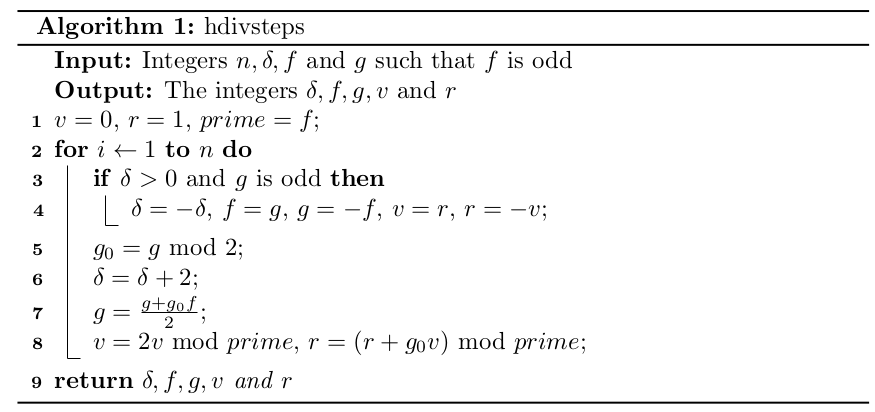

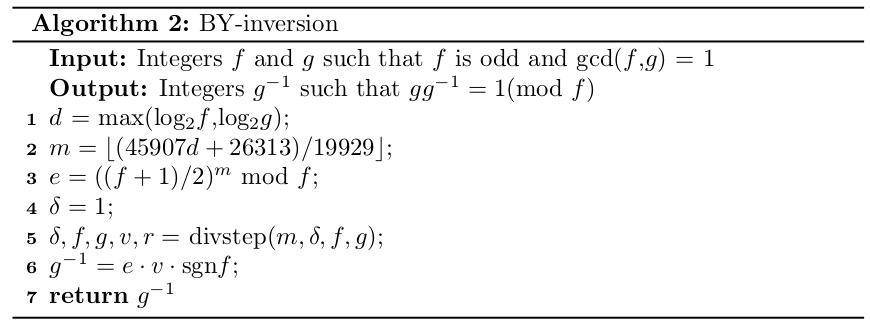

In [6]:
ALL_PRIME = {
"PRIME_23bit":4206593,
"PRIME_32bit":4294957057,
"PRIME_BN254":0x2523648240000001BA344D80000000086121000000000013A700000000000013,
"PRIME_Curve25519":0x7fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffed,
"PRIME_SECP256K1":0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F,
"PRIME_NIST_P256":0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff,
"PRIME_NIST_P384":0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffeffffffff0000000000000000ffffffff,
"PRIME_BLS12_381":0x1a0111ea397fe69a4b1ba7b6434bacd764774b84f38512bf6730d2a0f6b0f6241eabfffeb153ffffb9feffffffffaaab,
"PRIME_BLS24_509":0x155556FFFF39CA9BFCEDF2B4F9C0ECF6CB8AC8495D187E8C32EA0103E01090BB626E85BF7C18A0F0CFCB5C6071BAD3D2EE63BD076E8D9300A13D118DB8BFD2AB,
"PRIME_NIST_P521":0x1ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff
}

In [7]:
def hdivstep(m,delta,f,g,prime):
    v=0
    r=1
    max_fg_len = 0
    for i in range(m):
        d0 = 1 if(0<delta and g&1) else 0
        if(d0):
            delta = -delta
            v_temp = v
            v = r
            r = (-v_temp)%prime
            f_temp = f
            f = g
            g = -f_temp

        delta = delta +2
        g0 = g&1

        if(g0==1):
            r=(r+v)%prime
            g=(g+f)//2
        else:
            g=g//2
        v=(v+v)%prime
    return delta,f,g,v,r
    
def BYmodinver_hdiv(f,g):
    prime = f
    if (math.gcd(f, g) != 1) or (g>f):
        print("gcd(f,g) != 1")
        return 0
    else:
        # Initial Step
        d = len(f'{f:b}')
        m = (45907 * d + 26313) // 19929
        e = pow((f+1)//2, m, f)
        delta = 1
        
        # hdivstep
        delta,f,g,v,r = hdivstep(m,delta,f,g,prime)

        if(f<0):
            v=prime-v
        result = (e*v) % prime
        return result

In [8]:
test_case = 10000
wrong = 0
for prime_name in ALL_PRIME.keys():
    prime_f = ALL_PRIME[prime_name]
    for i in range(test_case):
        inp = random.randrange(prime_f)
        res = BYmodinver_hdiv(prime_f,inp)
        if(res*inp%prime_f!=1):
            print("Wrong Output at prime:",prime_f,"inp:",inp)
            wrong = 1
    
    if(wrong==0):
        print("No error for",prime_name)
    else:
        print("Error occur in",prime_name)
        wrong = 0

No error for PRIME_23bit
No error for PRIME_32bit
No error for PRIME_BN254
No error for PRIME_Curve25519
No error for PRIME_SECP256K1
No error for PRIME_NIST_P256
No error for PRIME_NIST_P384
No error for PRIME_BLS12_381
No error for PRIME_BLS24_509
No error for PRIME_NIST_P521


One vital thing to note is that the value $e$ in the algorithm can be precomputed for each modulo value. So, it is not counted toward the hardware computation cost of this inverse computation. Also, note that a modular multiplication with this precompute value is required at the end of the algorithm.

In the following hardware implementation, **instead of directly outputting the modular inverse value, the value that will be modular multiplied with the precomputed value is output instead**. The reason behind this setting is that the implementation that this module should be integrated into would typically have the modular multiplication module already. Instantiating the modular multiplication module inside this inversion module will result only in area redundancy.

---
# (Extra) Preparing for Implementation

## (Extra.1.) Preparing folders for each files types

In [9]:
!mkdir SIM #To keep files used in simulation
!mkdir RTL #To keep manual-design files
!mkdir DSLX #for DSLX and relate files

## (Extra.2.) Preparing files for verification

It is crucial to verify the correctness of the implementation. This section generates several files that will be used to verify the correctness of subsequent implementations.

The verifications are done with "iverilog" which is available as a conda-eda package. "iverilog" can perform a behavioral simulation to confirm that the design hardware is performing as we intended.

Again, note that the **hardware implemented does not directly output the inversion value**, but the value needs to be modular multiplied with a precomputed value. The precompute value can be calculated with the following python code.

In [10]:
# Function for generating pre_compute value
def find_precompute(modulo):
  d = len(f'{modulo:b}')
  m = (45907 * d + 26313) // 19929
  e = pow((modulo+1)//2, m, modulo)
  return e, m

In [11]:
print("Precompute for 23 bit:",find_precompute(4206593)[0])
print("Precompute for 256 bit:",'0x'+f'{find_precompute(0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff)[0]:x}')

Precompute for 23 bit: 3529182
Precompute for 256 bit: 0xe0000000bffffffe200000037ffffffee0000000400000039ffffffde0000


The test cases used in the subsequent simulation are generated with the below function and kept in the folder "SIM".

In [12]:
# Create tb case for modulo
def generate_tb_testcase(modulo):
  n_case = 1000
  inputA=[]
  outputA=[]
  BITLEN = len(f'{modulo:b}')

  for i in range(n_case):
      a = random.randrange(modulo)
      c = pow(a,modulo-2,modulo) #Inversion with Fermat's Little Theorem
      inputA.append(f'{a:0{(BITLEN+3)//4}x}')
      outputA.append(f'{c:0{(BITLEN+3)//4}x}')
      
  with open('SIM/tb_inputA_dat_'+str(BITLEN)+'bit.mem', 'w') as f:
      f.write('\n'.join(inputA))
      
  with open('SIM/tb_outputA_dat_'+str(BITLEN)+'bit.mem', 'w') as f:
      f.write('\n'.join(outputA))

In [13]:
generate_tb_testcase(4206593) #23bit
generate_tb_testcase(0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff) #256bit

In post-synthesis/post-layout simulation, technology files that describe the behavior of gates are required. The path for the technology files are set and the [bug](https://github.com/The-OpenROAD-Project/OpenLane/issues/518) are fixed.

In [6]:
PATH_TO_TECH = 'conda-env/share/pdk/sky130A/libs.ref/sky130_fd_sc_hd/verilog'
!sed 's/endif SKY130_FD_SC_HD__LPFLOW_BLEEDER_FUNCTIONAL_V/endif \/\/ SKY130_FD_SC_HD__LPFLOW_BLEEDER_FUNCTIONAL_V/' {PATH_TO_TECH}/sky130_fd_sc_hd.v > {PATH_TO_TECH}/sky130_fd_sc_hd_fix.v

---
# 3. RTL Implementation

## 3.1. Design Idea

There are three states: standby, compute and output state. The standby state waits for the start signal from outside of the module. When the start signal goes high, the input value $f$ and $g$ are latched to the register while $delta$,$v$, and $r$ are set to their initial value along with the state changing to compute state. 

In the compute state, the counter counts until reaching the set value while the values $delta$, $f$, $g$, $v$, and $r$ update their value every clock cycle. When the counter reaches the set value, the state changes to the output state.

In the output state, the flag finish is raised high while the output is computed from the $v$ register based on $f$ value. All other registers are then set to 0 while the state changes to standby, waiting for the next start signal.

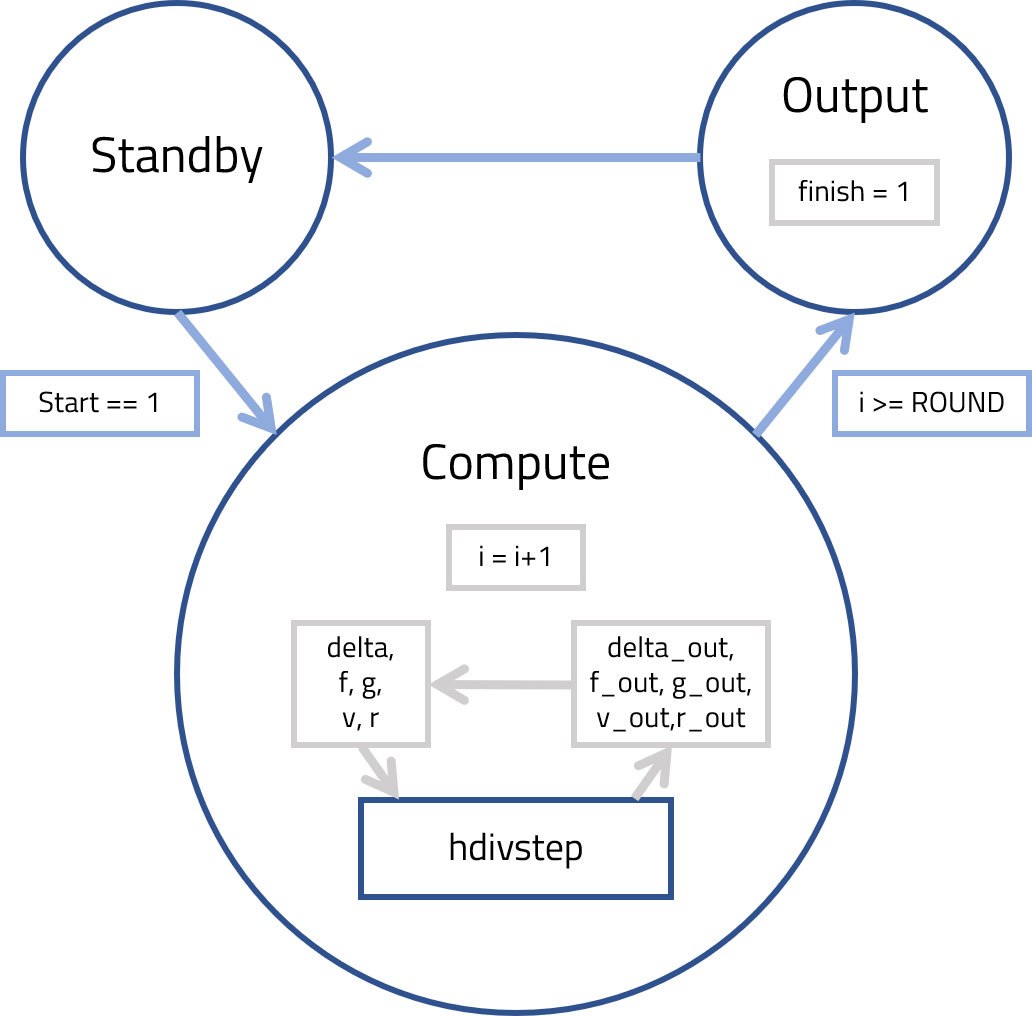

## 3.2. RTL Files

### 3.2.1. Write RTL files

This section contains the RTL files. All are kept in RTL folder.

In [15]:
%%writefile RTL/byinverse_23bit.v
`timescale 1ns / 1ps

module byinverse #(parameter BIT_LEN = 23, parameter MODULO = 23'd4206593)(clk,rst,start,f_in,g_in,out,finish);
    input clk;
    input rst;
    input start;
    input [BIT_LEN-1:0] f_in;
    input [BIT_LEN-1:0] g_in;
    output reg [BIT_LEN-1:0] out;
    output reg finish;

    localparam ROUND = (45907 * BIT_LEN + 26313) / 19929;
    localparam BIT_i = $clog2(ROUND);

    reg [BIT_i-1:0] i;
    reg [BIT_i+1:0] delta; //delta can be negative
    wire [BIT_i+1:0] delta_out;
    reg [1:0] state;
    reg [BIT_LEN:0] f,g; //f,g can be negative
    reg [BIT_LEN-1:0] v,r;
    wire [BIT_LEN:0] f_out,g_out;
    wire [BIT_LEN-1:0] v_out,r_out;

    hdivstep #(.BIT_LEN(BIT_LEN),.BIT_i(BIT_i),.MODULO(MODULO)) hdivstep (.delta_in(delta),.f_in(f),.g_in(g),.v_in(v),.r_in(r),.delta_out(delta_out),.f_out(f_out),.g_out(g_out),.v_out(v_out),.r_out(r_out));

    always @(posedge clk or negedge rst) begin
        if(!rst) begin
            i <= 0;
            state <= 0;
            delta <= 0;
            f <= 0;
            g <= 0;
            v <= 0;
            r <= 0;
            out <= 0;
            finish <= 0;
        end else begin
            if (state == 0) begin
                if(start) begin
                    state <= 1;
                    i <= 0;
                    delta <= 1;
                    f <= f_in;
                    g <= g_in;
                    v <= 0;
                    r <= 1;
                    finish <= 0;
                end
            end else if(state==1) begin
                if(i<ROUND) begin
                    i <= i+1;
                    delta <= delta_out;
                    f <= f_out;
                    g <= g_out;
                    v <= v_out;
                    r <= r_out;
                end else begin
                    state <= 2;
                end
            end else if(state ==2) begin
                if(f[BIT_LEN]) begin //if f<0
                    out <= MODULO-v;
                end else begin
                    out <= v;
                end
                finish <= 1;
                state <= 0;
                i <= 0;
                delta <= 0;
                f <= 0;
                g <= 0;
                v <= 0;
                r <= 0;
            end
        end
    end
endmodule

Writing RTL/byinverse_23bit.v


In [16]:
%%writefile RTL/hdivstep.v
`timescale 1ns / 1ps

module hdivstep  #(parameter BIT_LEN = 32, parameter BIT_i = 7, parameter MODULO = 32'hffffd801)(delta_in,f_in,g_in,v_in,r_in,delta_out,f_out,g_out,v_out,r_out);
    input [BIT_i+1:0] delta_in;
    input [BIT_LEN:0] f_in;
    input [BIT_LEN:0] g_in;
    input [BIT_LEN-1:0] v_in;
    input [BIT_LEN-1:0] r_in;
    output [BIT_i+1:0] delta_out;
    output [BIT_LEN:0] f_out;
    output [BIT_LEN:0] g_out;
    output [BIT_LEN-1:0] v_out;
    output [BIT_LEN-1:0] r_out;

    wire [BIT_LEN:0] g_mid;
    wire [BIT_LEN-1:0] v_mid,r_mid,r_temp2;
    wire [BIT_LEN:0] g_temp,g_temp2;
    wire [BIT_LEN:0] v_temp,r_temp;
    wire d0,g0;

    assign d0 = ~delta_in[BIT_i+1] && g_in[0];
    assign g0 = g_mid[0];

    assign delta_out = (d0) ? (~delta_in)+3 : delta_in+2;

    assign v_mid = (d0)? r_in : v_in;
    assign r_mid = (d0)? ((v_in > 0) ? MODULO - v_in : 0) : r_in;
    assign f_out = (d0)? g_in : f_in;
    assign g_mid = (d0)? ~f_in + 1 : g_in;

    mod_add #(.BIT_LEN(BIT_LEN),.MODULO(MODULO)) mod_add1 (.dina(v_mid),.dinb(v_mid),.dout(v_out));
    mod_add #(.BIT_LEN(BIT_LEN),.MODULO(MODULO)) mod_add2 (.dina(r_mid),.dinb(v_mid),.dout(r_temp2));
    assign r_out = (g0)? r_temp2 : r_mid;
    assign g_temp2 = g_mid+f_out;
    assign g_temp = (g_mid[BIT_LEN]==f_out[BIT_LEN]) ? {g_mid[BIT_LEN],g_temp2[BIT_LEN:1]} : {g_temp2[BIT_LEN],g_temp2[BIT_LEN],g_temp2[BIT_LEN-1:1]};
    //In the case of same sign in g,f: keep the sign from g_mid and divide the addition by 2, In the case of different sign, use the result sign and pad the new bit with that value
    assign g_out = (g0)? g_temp : {g_mid[BIT_LEN],g_mid[BIT_LEN],g_mid[BIT_LEN-1:1]};
endmodule

Writing RTL/hdivstep.v


In [17]:
%%writefile RTL/mod_add.v
`timescale 1ns / 1ps

module mod_add#(parameter BIT_LEN = 32, parameter MODULO = 32'hffffd801)(dina,dinb,dout);
    input [BIT_LEN-1:0] dina;
    input [BIT_LEN-1:0] dinb;
    output [BIT_LEN-1:0] dout;

    localparam MINUS_MOD = 2**(BIT_LEN+1)-{1'b0,MODULO};

    // Addition path
    wire [BIT_LEN:0] ADD_PATH_1; // A+B
    wire [BIT_LEN:0] ADD_PATH_2; // A+B-mod
    wire [BIT_LEN:0] ADD_PATH_2C;
    wire [BIT_LEN:0] ADD_PATH_2S;
    wire ADD_alt;
    wire [BIT_LEN-1:0] ADD_PATH_OUT;
    wire dummy1;
    assign ADD_PATH_1 = dina + dinb;
    csa #(.BIT_LEN(BIT_LEN+1)) csa_add (.A({1'b0,dina}),.B({1'b0,dinb}),.Cin(MINUS_MOD),.Cout({dummy1,ADD_PATH_2C[BIT_LEN:1]}),.S(ADD_PATH_2S));
    assign ADD_PATH_2C[0] = 0;
    assign ADD_PATH_2 = ADD_PATH_2C + ADD_PATH_2S;
    assign ADD_alt = !ADD_PATH_2[BIT_LEN];
    assign ADD_PATH_OUT = ADD_alt ? ADD_PATH_2[BIT_LEN-1:0] : ADD_PATH_1[BIT_LEN-1:0];

    assign dout = ADD_PATH_OUT;
endmodule

Writing RTL/mod_add.v


In [18]:
%%writefile RTL/csa.v
`timescale 1ns / 1ps

module csa #(parameter BIT_LEN = 33)(A,B,Cin,Cout,S);
    input [BIT_LEN-1:0] A;
    input [BIT_LEN-1:0] B;
    input [BIT_LEN-1:0] Cin;
    output [BIT_LEN-1:0] Cout;
    output [BIT_LEN-1:0] S;

    genvar i;
    generate
        for (i=0; i<BIT_LEN; i=i+1) begin
            full_adder full_adder(.A(A[i]),.B(B[i]),.Cin(Cin[i]),.Cout(Cout[i]),.S(S[i]));
        end
    endgenerate
endmodule

Writing RTL/csa.v


In [19]:
%%writefile RTL/full_adder.v
`timescale 1ns / 1ps

module full_adder(A,B,Cin,Cout,S);
    input A;
    input B;
    input Cin;
    output Cout;
    output S;

    assign S = A ^ B ^ Cin;
    assign Cout = (A & B) | (Cin & (A ^ B));

endmodule

Writing RTL/full_adder.v


### 3.2.2. Behavioral Simulation

The testbench is written to the SIM folder. The testbench loads the input/output from the previously generated test case and uses them to verify the correctness of the implemented RTL files.

Again, the output is modular multiplied with a precomputed value saved in *parameter EE_hdiv* before being checked with the inverse value.

In [20]:
%%writefile SIM/tb_byinverse_23bit.v
`timescale 1ns / 1ps

`define M_TEST_CASE         100

module tb_byinverse();

    reg clk,rst;
    parameter PERIOD = 10;
    always #(PERIOD/2) clk = ~clk;

    parameter BIT_LEN = 23;
    parameter MODULO = 23'd4206593;
    parameter EE_hdiv = 23'd3529182; // ROUND = (45907 * BIT_LEN + 26313) / 19929;

    reg start;
    wire finish;

    initial begin
      $dumpfile("simwaveform.vcd");
      $dumpvars(0,tb_byinverse);
    end

    parameter INPUT_BITLEN = BIT_LEN;
    parameter OUTPUT_BITLEN = BIT_LEN;
    parameter TEST_CASE = `M_TEST_CASE;
    parameter i_BITLEN = $clog2(TEST_CASE);

    reg [INPUT_BITLEN-1:0] inA;
    wire [OUTPUT_BITLEN-1:0] outA;
    reg [OUTPUT_BITLEN-1:0] outA_prev;
    wire out_change;
    reg [OUTPUT_BITLEN-1:0] out_diff;
    reg all_correct;
    assign out_change = (outA == outA_prev)? 0 : 1;
    always @(posedge clk) begin
        outA_prev <= outA;
    end

    reg [i_BITLEN-1:0] i;
    reg [INPUT_BITLEN-1:0] inputA_mem [0:TEST_CASE-1];
    reg [OUTPUT_BITLEN-1:0] outputA_mem [0:TEST_CASE-1];

    wire [2*OUTPUT_BITLEN-1:0] output_convert;
    wire [OUTPUT_BITLEN-1:0] output_convert2;

    assign output_convert = (outA*EE_hdiv)%MODULO;
    assign output_convert2 = output_convert[OUTPUT_BITLEN-1:0];

    byinverse #(.BIT_LEN(BIT_LEN),.MODULO(MODULO)) byinverse (.clk(clk),.rst(rst),.start(start),.f_in(MODULO),.g_in(inA),.out(outA),.finish(finish));

    initial begin
        clk = 0;
        rst = 0;
        inA = 0;
        start = 0;
        out_diff=0;
        all_correct = 1;
        $readmemh("/content/SIM/tb_inputA_dat_23bit.mem", inputA_mem);
        $readmemh("/content/SIM/tb_outputA_dat_23bit.mem", outputA_mem);
        #(PERIOD*5)
        rst = 1;
        #(PERIOD*5)
        for (i=0; i<TEST_CASE; i=i+1) begin
            #(PERIOD*5)
            start = 1;
            inA = inputA_mem[i];
            #(PERIOD)
            start = 0;
            wait(out_change);
            out_diff = output_convert2-outputA_mem[i];
            $display("Test case: 0x%0h, \tDifference: 0x%0h, \tOutput_convert2: 0x%0h, \tCorrect value: 0x%0h",i,out_diff,output_convert2,outputA_mem[i]);
            if (out_diff > 0) begin
                $display("Output is INCORRECT!!!!");
                all_correct = 0;
            end
        end

        #(PERIOD*10)
        if(all_correct==1) begin
            $display("All test cases are corrected");
        end else begin
            $display("Error!!!");
        end

        #(PERIOD*10)
        $finish;
    end

endmodule

Writing SIM/tb_byinverse_23bit.v


In [21]:
# Running behavioral simulation with iverilog
!iverilog -Wall -Winfloop -o SIM/sim_tb_byinverse_23bit -s tb_byinverse SIM/tb_byinverse_23bit.v RTL/byinverse_23bit.v RTL/hdivstep.v RTL/mod_add.v RTL/csa.v RTL/full_adder.v
!vvp SIM/sim_tb_byinverse_23bit

RTL/mod_add.v:19: warning: Port 3 (Cin) of csa expects 24 bits, got 33.
RTL/mod_add.v:19:        : Pruning 9 high bits of the expression.
RTL/mod_add.v:19: warning: Port 3 (Cin) of csa expects 24 bits, got 33.
RTL/mod_add.v:19:        : Pruning 9 high bits of the expression.
VCD info: dumpfile simwaveform.vcd opened for output.
Test case: 0x0, 	Difference: 0x0, 	Output_convert2: 0x2e4653, 	Correct value: 0x2e4653
Test case: 0x1, 	Difference: 0x0, 	Output_convert2: 0x1eae97, 	Correct value: 0x1eae97
Test case: 0x2, 	Difference: 0x0, 	Output_convert2: 0x51679, 	Correct value: 0x51679
Test case: 0x3, 	Difference: 0x0, 	Output_convert2: 0x280043, 	Correct value: 0x280043
Test case: 0x4, 	Difference: 0x0, 	Output_convert2: 0x2d58d7, 	Correct value: 0x2d58d7
Test case: 0x5, 	Difference: 0x0, 	Output_convert2: 0xf7f42, 	Correct value: 0xf7f42
Test case: 0x6, 	Difference: 0x0, 	Output_convert2: 0x2ffdd0, 	Correct value: 0x2ffdd0
Test case: 0x7, 	Difference: 0x0, 	Output_convert2: 0x269bab, 	Co

## 3.3. Run OpenLane Flow

In [22]:
DESIGN = 'byinverse'
%env DESIGN={DESIGN}
DESIGN_FILES = 'RTL/byinverse_23bit.v RTL/csa.v RTL/full_adder.v RTL/hdivstep.v RTL/mod_add.v'
%env DESIGN_FILES={DESIGN_FILES}

env: DESIGN=byinverse
env: DESIGN_FILES=RTL/byinverse_23bit.v RTL/csa.v RTL/full_adder.v RTL/hdivstep.v RTL/mod_add.v


In [23]:
%%writefile config.tcl
set ::env(DESIGN_NAME) $::env(DESIGN)

set ::env(VERILOG_FILES) $::env(DESIGN_FILES)

set ::env(CLOCK_TREE_SYNTH) 1
set ::env(CLOCK_PORT) "clk"
set ::env(CLOCK_NET) "clk"
set ::env(CLOCK_PERIOD) "15"

set ::env(PL_RANDOM_GLB_PLACEMENT) 1

set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 500 500"
set ::env(PL_TARGET_DENSITY) 0.70


set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6

set ::env(DIODE_INSERTION_STRATEGY) 3

# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

Writing config.tcl


In [24]:
!flow.tcl -design . -ignore_mismatches

OpenLane cb59d1f84deb5cedbb5b0a3e3f3b4129a967c988
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[WARNING]: OpenLane may not function properly: 'OL_INSTALL_DIR'
The version of open_pdks used in building the PDK does not match the version OpenLane was tested on (installed: a519523b0d9bc913a6f87a5eed083597ed9e2e93, tested: 3af133706e554a740cfe60f21e773d9eaa41838c)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
The version of magic used in building the PDK does not match the version OpenLane was tested on (installed: f0668447616c071f145d3d3fa1dfde9762b62b7b, tested: 94daf986ab9aa94a9ae2ac3539fa5def9bd2a1ac)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]:

## 3.4. Post Implementation Flow

Find the path to last run

In [25]:
MOST_RECENT_RUN_PATH = sorted(os.listdir('runs'))[-1]
print(MOST_RECENT_RUN_PATH)

RUN_2022.11.20_05.19.54


### 3.4.1. (Optional) Download the Openlane relate information (reports and results)

In [26]:
PATH_TO_RUN = "/content/runs/"+MOST_RECENT_RUN_PATH
ZIP_FILE = "/content/"+MOST_RECENT_RUN_PATH+".zip"
!zip -q -r {ZIP_FILE} {PATH_TO_RUN}
files.download(ZIP_FILE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 3.4.2. Post-implementation gate-level simulation

Create a new testbench for gate-level simulation as our module now does not require the parameters to be passed upon. (The only difference is that there is no parameter at the instantiation of "byinverse" module) 

In [27]:
%%writefile SIM/tb_byinverse_23bit_gl.v
`timescale 1ns / 1ps

`define M_TEST_CASE         100

module tb_byinverse();

    reg clk,rst;
    parameter PERIOD = 10;
    always #(PERIOD/2) clk = ~clk;

    parameter BIT_LEN = 23;
    parameter MODULO = 23'd4206593;
    parameter EE_hdiv = 23'd3529182; // ROUND = (45907 * BIT_LEN + 26313) / 19929;

    reg start;
    wire finish;

    initial begin
      $dumpfile("simwaveform.vcd");
      $dumpvars(0,tb_byinverse);
    end

    parameter INPUT_BITLEN = BIT_LEN;
    parameter OUTPUT_BITLEN = BIT_LEN;
    parameter TEST_CASE = `M_TEST_CASE;
    parameter i_BITLEN = $clog2(TEST_CASE);

    reg [INPUT_BITLEN-1:0] inA;
    wire [OUTPUT_BITLEN-1:0] outA;
    reg [OUTPUT_BITLEN-1:0] outA_prev;
    wire out_change;
    reg [OUTPUT_BITLEN-1:0] out_diff;
    reg all_correct;
    assign out_change = (outA == outA_prev)? 0 : 1;
    always @(posedge clk) begin
        outA_prev <= outA;
    end

    reg [i_BITLEN-1:0] i;
    reg [INPUT_BITLEN-1:0] inputA_mem [0:TEST_CASE-1];
    reg [OUTPUT_BITLEN-1:0] outputA_mem [0:TEST_CASE-1];

    wire [2*OUTPUT_BITLEN-1:0] output_convert;
    wire [OUTPUT_BITLEN-1:0] output_convert2;

    assign output_convert = (outA*EE_hdiv)%MODULO;
    assign output_convert2 = output_convert[OUTPUT_BITLEN-1:0];

    byinverse byinverse (.clk(clk),.rst(rst),.start(start),.f_in(MODULO),.g_in(inA),.out(outA),.finish(finish));

    initial begin
        clk = 0;
        rst = 0;
        inA = 0;
        start = 0;
        out_diff=0;
        all_correct = 1;
        $readmemh("/content/SIM/tb_inputA_dat_23bit.mem", inputA_mem);
        $readmemh("/content/SIM/tb_outputA_dat_23bit.mem", outputA_mem);
        #(PERIOD*5)
        rst = 1;
        #(PERIOD*5)
        for (i=0; i<TEST_CASE; i=i+1) begin
            #(PERIOD*5)
            start = 1;
            inA = inputA_mem[i];
            #(PERIOD)
            start = 0;
            wait(out_change);
            out_diff = output_convert2-outputA_mem[i];
            $display("Test case: 0x%0h, \tDifference: 0x%0h, \tOutput_convert2: 0x%0h, \tCorrect value: 0x%0h",i,out_diff,output_convert2,outputA_mem[i]);
            if (out_diff > 0) begin
                $display("Output is INCORRECT!!!!");
                all_correct = 0;
            end
        end

        #(PERIOD*10)
        if(all_correct==1) begin
            $display("All test cases are corrected");
        end else begin
            $display("Error!!!");
        end

        #(PERIOD*10)
        $finish;
    end

endmodule

Writing SIM/tb_byinverse_23bit_gl.v


In [28]:
GL_PATH = 'runs/'+MOST_RECENT_RUN_PATH+"/results/final/verilog/gl/"+DESIGN+".nl.v"
!iverilog -DFUNCTIONAL -DUNIT_DELAY=#1 -o SIM/sim_tb_byinverse_23bit_gl -s tb_byinverse SIM/tb_byinverse_23bit_gl.v {GL_PATH} {PATH_TO_TECH}/primitives.v {PATH_TO_TECH}/sky130_fd_sc_hd_fix.v
!vvp SIM/sim_tb_byinverse_23bit_gl

VCD info: dumpfile simwaveform.vcd opened for output.
Test case: 0x0, 	Difference: 0x0, 	Output_convert2: 0x2e4653, 	Correct value: 0x2e4653
Test case: 0x1, 	Difference: 0x0, 	Output_convert2: 0x1eae97, 	Correct value: 0x1eae97
Test case: 0x2, 	Difference: 0x0, 	Output_convert2: 0x51679, 	Correct value: 0x51679
Test case: 0x3, 	Difference: 0x0, 	Output_convert2: 0x280043, 	Correct value: 0x280043
Test case: 0x4, 	Difference: 0x0, 	Output_convert2: 0x2d58d7, 	Correct value: 0x2d58d7
Test case: 0x5, 	Difference: 0x0, 	Output_convert2: 0xf7f42, 	Correct value: 0xf7f42
Test case: 0x6, 	Difference: 0x0, 	Output_convert2: 0x2ffdd0, 	Correct value: 0x2ffdd0
Test case: 0x7, 	Difference: 0x0, 	Output_convert2: 0x269bab, 	Correct value: 0x269bab
Test case: 0x8, 	Difference: 0x0, 	Output_convert2: 0x1b6f30, 	Correct value: 0x1b6f30
Test case: 0x9, 	Difference: 0x0, 	Output_convert2: 0x3cf190, 	Correct value: 0x3cf190
Test case: 0xa, 	Difference: 0x0, 	Output_convert2: 0x3581ae, 	Correct value: 0x

### 3.4.3. View the implementation summary

In [29]:
pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

,0
design,/content
design_name,byinverse
config,RUN_2022.11.20_05.19.54
flow_status,flow completed
total_runtime,0h9m29s0ms
routed_runtime,0h6m31s0ms
(Cell/mm^2)/Core_Util,10480.0
DIEAREA_mm^2,0.25
CellPer_mm^2,5240.0
OpenDP_Util,-1


Design area

In [30]:
!cat runs/{MOST_RECENT_RUN_PATH}/reports/signoff/25-rcx_sta.area.rpt


 report_design_area
Design area 29312 u^2 13% utilization.


The latency for this 23-bit prime modular inversion computation can be calculated by multiplying the clock period (15 ns) with the total number of cycles required from the start flag raised until the output.

Of course, this latency does not include the final modular multiplication computation. So, the actual latency will increase a around 7-10 clock cycles depending on the modular multiplication module.

In [31]:
_, compute_iter = find_precompute(4206593)
print(15*(compute_iter+2))

840


### 3.4.4. View the chip layout

The chip layout can be viewed with the following code, but it requires some time to run.

In [ ]:
# # Took a long time to run!!!
# gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
# library = gdstk.read_gds(gdss[-1])
# top_cells = library.top_level()
# top_cells[0].write_svg('byinverse.svg')
# cairosvg.svg2png(url='byinverse.svg', write_to='byinverse.png',output_width = 800,output_height = 800)
# image = PIL.Image.open('byinverse.png')
# image

Download the GDS file and view with Klayout is more recommended. It is possible to get a similar layout as below.

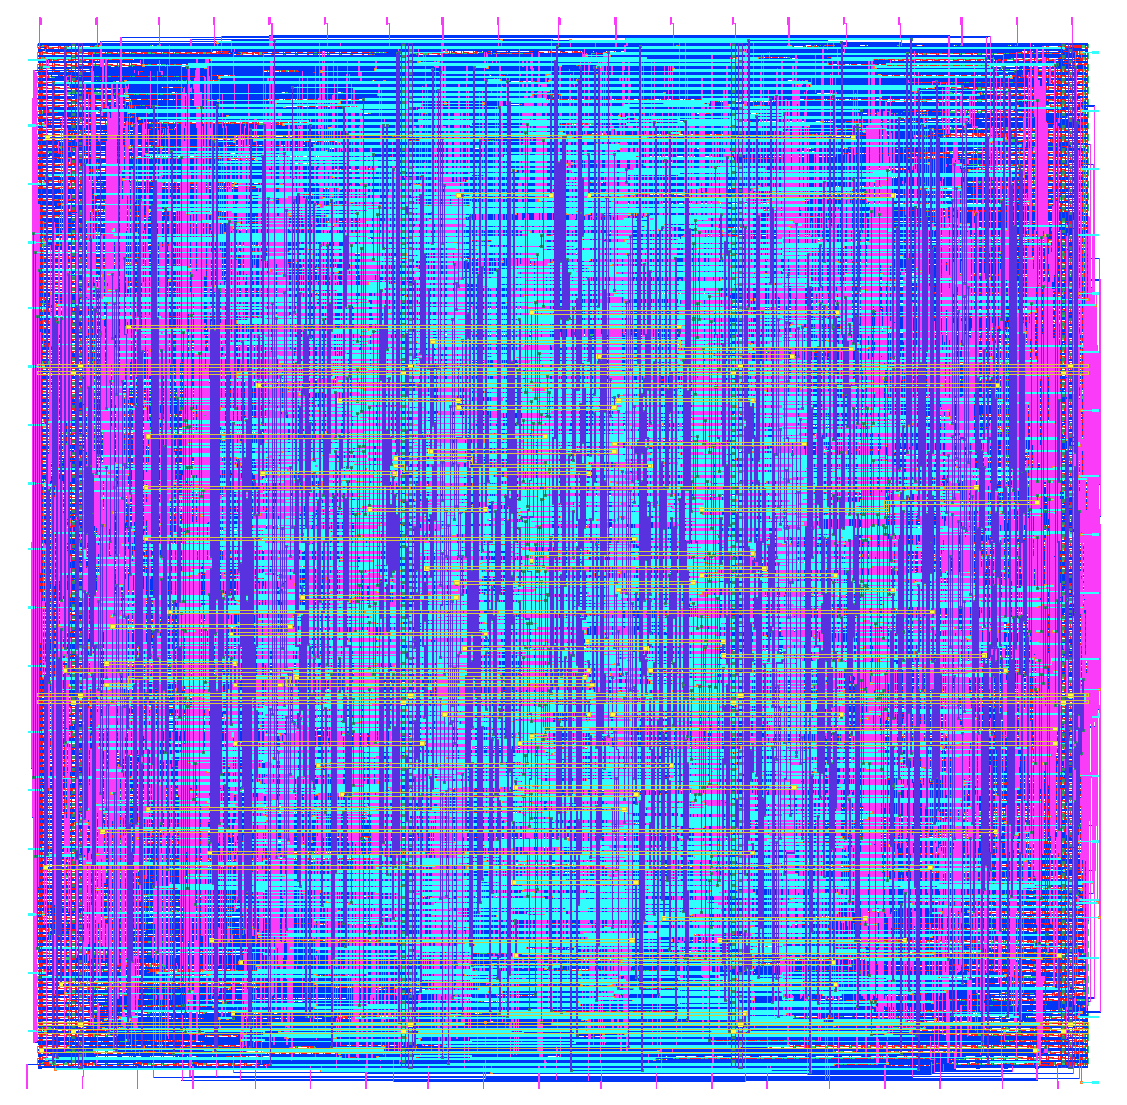

---
# 4. Implementation with Some Part Auto-generated with DSLX 

## 4.1. Write hdivstep with DSLX

In [32]:
%%bash -c 'cat > DSLX/hdivstep_wrap.x; interpreter_main DSLX/hdivstep_wrap.x'
import std

fn byinverse_iter_cal(MOD_SZ: u32) -> u32 { (u32:45907 * MOD_SZ + u32:26313) / u32:19929 }
fn byinverse_iter_width(SZ: u32) -> u32 { std::clog2(SZ) }

fn hdivstep <MOD_SZ_P1: u32,MOD_SZ_P2: u32 = MOD_SZ_P1 + u32:1,DELTA_SZ: u32>(delta:sN[DELTA_SZ],f:sN[MOD_SZ_P1],g:sN[MOD_SZ_P1],v:uN[MOD_SZ_P1],r:uN[MOD_SZ_P1],prime:uN[MOD_SZ_P1]) -> (sN[DELTA_SZ],sN[MOD_SZ_P1],sN[MOD_SZ_P1],uN[MOD_SZ_P1],uN[MOD_SZ_P1]) {
  let d0 = ((g as uN[MOD_SZ_P1])[:1] & u1:1) & (delta > sN[DELTA_SZ]:0);
  let delta = if (d0) {-delta + sN[DELTA_SZ]:2} else {delta + sN[DELTA_SZ]:2};
  let f_temp = f;
  let f =  if (d0) { g } else { f };
  let g =  if (d0) { -f_temp } else { g };
  let v_temp = if (v > uN[MOD_SZ_P1]:0) {prime-v} else {v};
  let v =  if (d0) { r } else { v };
  let r =  if (d0) { v_temp } else { r };
  
  let g0 = (((g as uN[MOD_SZ_P1])[:1] & u1:1) == u1:1);
  let r = if (g0) {r+v} else {r};
  let v = v + v;
  let r = if(r>=prime) {r-prime} else {r};
  let v = if(v>=prime) {v-prime} else {v};
  let g_temp = if(g0) { g as sN[MOD_SZ_P2] +f as sN[MOD_SZ_P2] } else {g as sN[MOD_SZ_P2]};
  let g = (g_temp >> 1) as sN[MOD_SZ_P1];
  
  (delta,f,g,v,r)
}

fn hdivstep_wrap23 (delta:s8,f:s24,g:s24,v:u24,r:u24) -> (s8,s24,s24,u24,u24) {
  let (delta,f,g,v,r) = hdivstep(delta,f,g,v,r,u24:4206593);
  (delta,f,g,v,r)
}

fn hdivstep_wrap256 (delta:s12,f:sN[257],g:sN[257],v:uN[257],r:uN[257]) -> (s12,sN[257],sN[257],uN[257],uN[257]) {
  let (delta,f,g,v,r) = hdivstep(delta,f,g,v,r,uN[257]:0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff);
  (delta,f,g,v,r)
}

fn byinverse_23 <MOD_SZ: u32, MOD_SZ_P1: u32 = MOD_SZ + u32:1, MOD_SZ_P2: u32 = MOD_SZ + u32:2, CNT_SZ: u32 = byinverse_iter_width(byinverse_iter_cal(MOD_SZ)), DELTA_SZ: u32 = CNT_SZ + u32:2> (f_in: uN[MOD_SZ], g_in: uN[MOD_SZ]) -> (sN[DELTA_SZ],sN[MOD_SZ_P1],sN[MOD_SZ_P1],uN[MOD_SZ],uN[MOD_SZ]) {
  let prime = f_in as uN[MOD_SZ_P1];
  let delta = sN[DELTA_SZ]:1;
  let f = f_in as sN[MOD_SZ_P1];
  let g = g_in as sN[MOD_SZ_P1];
  let v = uN[MOD_SZ_P1]:0;
  let r = uN[MOD_SZ_P1]:1;

  let ROUND = byinverse_iter_cal(MOD_SZ) as uN[CNT_SZ];

  let (delta,f,g,v,r) = for (i, (delta,f,g,v,r)): (uN[CNT_SZ], (sN[DELTA_SZ],sN[MOD_SZ_P1],sN[MOD_SZ_P1],uN[MOD_SZ_P1],uN[MOD_SZ_P1])) in range(uN[CNT_SZ]:0, ROUND) {
    let (delta,f,g,v,r) = hdivstep_wrap23(delta,f,g,v,r);
    (delta,f,g,v,r)
  }((delta,f,g,v,r));

  let v = if (f>sN[MOD_SZ_P1]:0) { v } else {prime-v};
  (delta,f,g,v as uN[MOD_SZ],r as uN[MOD_SZ])
}

fn byinverse23 (inp:u23) -> u23 {
  let (_,_,_,v,_) = byinverse_23(u23:4206593,inp);
  v
}

#[test]
fn byinverse23_test() {
  let _= assert_eq(u23:850519,byinverse23(u23:2724423));
  let _= assert_eq(u23:1224026,byinverse23(u23:3258756));
  let _= assert_eq(u23:1592419,byinverse23(u23:60732));
  let _= assert_eq(u23:3325948,byinverse23(u23:2415136));
  _
}

fn byinverse_256 <MOD_SZ: u32, MOD_SZ_P1: u32 = MOD_SZ + u32:1, MOD_SZ_P2: u32 = MOD_SZ + u32:2, CNT_SZ: u32 = byinverse_iter_width(byinverse_iter_cal(MOD_SZ)), DELTA_SZ: u32 = CNT_SZ + u32:2> (f_in: uN[MOD_SZ], g_in: uN[MOD_SZ]) -> (sN[DELTA_SZ],sN[MOD_SZ_P1],sN[MOD_SZ_P1],uN[MOD_SZ],uN[MOD_SZ]) {
  let prime = f_in as uN[MOD_SZ_P1];
  let delta = sN[DELTA_SZ]:1;
  let f = f_in as sN[MOD_SZ_P1];
  let g = g_in as sN[MOD_SZ_P1];
  let v = uN[MOD_SZ_P1]:0;
  let r = uN[MOD_SZ_P1]:1;

  let ROUND = byinverse_iter_cal(MOD_SZ) as uN[CNT_SZ];

  let (delta,f,g,v,r) = for (i, (delta,f,g,v,r)): (uN[CNT_SZ], (sN[DELTA_SZ],sN[MOD_SZ_P1],sN[MOD_SZ_P1],uN[MOD_SZ_P1],uN[MOD_SZ_P1])) in range(uN[CNT_SZ]:0, ROUND) {
    let (delta,f,g,v,r) = hdivstep_wrap256(delta,f,g,v,r);
    (delta,f,g,v,r)
  }((delta,f,g,v,r));

  let v = if (f>sN[MOD_SZ_P1]:0) { v } else {prime-v};
  (delta,f,g,v as uN[MOD_SZ],r as uN[MOD_SZ])
}

fn byinverse256 (inp:uN[256]) -> uN[256] {
  let (_,_,_,v,_) = byinverse_256(uN[256]:0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff,inp);
  v
}

#[test]
fn byinverse256_test() {
  let _= assert_eq(uN[256]:29473326114196673764976211609009194982837374493936929604966415079852913224276, byinverse256(uN[256]:62204821606984285821019328561178945592089889066342417327930098705308772598012));
  let _= assert_eq(uN[256]:31672993755810900567709127047148862627030360764918443050416446897337254759610, byinverse256(uN[256]:32571146686236624447198955079409185875265070393957705822845073036974398609874));
  let _= assert_eq(uN[256]:85045510987308162822721663177348222806155377186989244076644514702952535517579, byinverse256(uN[256]:48379047030329594337053559773241414452014433408025603061231763799478348569619));
  let _= assert_eq(uN[256]:88947708573798094097897595523754938331226603440902957332538615016920358272316, byinverse256(uN[256]:111084387406109674405984684343145161925317982025905033915859978228213587561379));
  _
}

[ RUN UNITTEST  ] byinverse23_test
[            OK ]
[ RUN UNITTEST  ] byinverse256_test
[            OK ]
[===============] 2 test(s) ran; 0 failed; 0 skipped.


## 4.2. Conversion from DSLX to Verilog

### 4.2.1. Conversion

In [33]:
DSLX_DESIGN = 'hdivstep_wrap23'
DSLX_DESIGN_FILE = 'hdivstep_wrap'
%env DSLX_DESIGN={DSLX_DESIGN}
%env DSLX_DESIGN_FILE={DSLX_DESIGN_FILE}

env: DSLX_DESIGN=hdivstep_wrap23
env: DSLX_DESIGN_FILE=hdivstep_wrap


In [34]:
!ir_converter_main --top={DSLX_DESIGN} DSLX/{DSLX_DESIGN_FILE}.x > DSLX/{DSLX_DESIGN}.ir
!opt_main DSLX/{DSLX_DESIGN}.ir > DSLX/{DSLX_DESIGN}_opt.ir
#!cat DSLX/{DSLX_DESIGN}_opt.ir

In [35]:
!codegen_main --use_system_verilog=false --module_name={DSLX_DESIGN} --generator=combinational DSLX/{DSLX_DESIGN}_opt.ir > DSLX/{DSLX_DESIGN}_comb.v
!cat DSLX/{DSLX_DESIGN}_comb.v

module hdivstep_wrap23(
  input wire [7:0] delta,
  input wire [23:0] f,
  input wire [23:0] g,
  input wire [23:0] v,
  input wire [23:0] r,
  output wire [103:0] out
);
  wire [23:0] sub_198;
  wire d0;
  wire [23:0] v_temp__1;
  wire [7:0] neg_202;
  wire [23:0] g__3;
  wire [23:0] f__2;
  wire [23:0] r__5;
  wire [23:0] v__5;
  wire [24:0] sign_ext_211;
  wire g0__1;
  wire [23:0] add_214;
  wire [6:0] add_215;
  wire [6:0] add_217;
  wire [24:0] add_219;
  wire [23:0] v__6;
  wire [23:0] r__6;
  wire [23:0] add_231;
  wire [23:0] add_233;
  wire [7:0] delta__3;
  wire [23:0] g_temp__2;
  wire [23:0] v__7;
  wire [23:0] r__7;
  assign sub_198 = 24'h40_3001 - v;
  assign d0 = g[0] & $signed(delta) > $signed(8'h00);
  assign v_temp__1 = v != 24'h00_0000 ? sub_198 : v;
  assign neg_202 = -delta;
  assign g__3 = d0 ? -f : g;
  assign f__2 = d0 ? g : f;
  assign r__5 = d0 ? v_temp__1 : r;
  assign v__5 = d0 ? r : v;
  assign sign_ext_211 = {{1{g__3[23]}}, g__3};
  assign g0__1 = g__3[0]

### 4.2.2. Behavioral Simulation

In [36]:
%%writefile DSLX/byinverse_23bit_dslx_part.v
`timescale 1ns / 1ps

module byinverse #(parameter BIT_LEN = 23, parameter MODULO = 23'd4206593)(clk,rst,start,f_in,g_in,out,finish);
    input clk;
    input rst;
    input start;
    input [BIT_LEN-1:0] f_in;
    input [BIT_LEN-1:0] g_in;
    output reg [BIT_LEN-1:0] out;
    output reg finish;

    localparam ROUND = (45907 * BIT_LEN + 26313) / 19929;
    localparam BIT_i = $clog2(ROUND);

    reg [BIT_i-1:0] i;
    reg [BIT_i+1:0] delta; //delta can be negative
    wire [BIT_i+1:0] delta_out;
    reg [1:0] state;
    reg [BIT_LEN:0] f,g; //f,g can be negative
    reg [BIT_LEN:0] v,r;
    wire [BIT_LEN:0] f_out,g_out;
    wire [BIT_LEN:0] v_out,r_out;

    hdivstep_wrap23 hdivstep_wrap23 (.delta(delta),.f(f),.g(g),.v(v),.r(r),.out({delta_out,f_out,g_out,v_out,r_out}));

    always @(posedge clk or negedge rst) begin
        if(!rst) begin
            i <= 0;
            state <= 0;
            delta <= 0;
            f <= 0;
            g <= 0;
            v <= 0;
            r <= 0;
            out <= 0;
            finish <= 0;
        end else begin
            if (state == 0) begin
                if(start) begin
                    state <= 1;
                    i <= 0;
                    delta <= 1;
                    f <= f_in;
                    g <= g_in;
                    v <= 0;
                    r <= 1;
                    finish <= 0;
                end
            end else if(state==1) begin
                if(i<ROUND) begin
                    i <= i+1;
                    delta <= delta_out;
                    f <= f_out;
                    g <= g_out;
                    v <= v_out;
                    r <= r_out;
                end else begin
                    state <= 2;
                end
            end else if(state ==2) begin
                if(f[BIT_LEN]) begin //if f<0
                    out <= MODULO-v;
                end else begin
                    out <= v;
                end
                finish <= 1;
                state <= 0;
                i <= 0;
                delta <= 0;
                f <= 0;
                g <= 0;
                v <= 0;
                r <= 0;
            end
        end
    end
endmodule

Writing DSLX/byinverse_23bit_dslx_part.v


In [37]:
!iverilog -Wall -Winfloop -o SIM/sim_tb_byinverse_23bit_dslx_part -s tb_byinverse SIM/tb_byinverse_23bit.v DSLX/byinverse_23bit_dslx_part.v DSLX/hdivstep_wrap23_comb.v
!vvp SIM/sim_tb_byinverse_23bit_dslx_part

DSLX/hdivstep_wrap23_comb.v:1: warning: timescale for hdivstep_wrap23 inherited from another file.
DSLX/byinverse_23bit_dslx_part.v:1: ...: The inherited timescale is here.
VCD info: dumpfile simwaveform.vcd opened for output.
Test case: 0x0, 	Difference: 0x0, 	Output_convert2: 0x2e4653, 	Correct value: 0x2e4653
Test case: 0x1, 	Difference: 0x0, 	Output_convert2: 0x1eae97, 	Correct value: 0x1eae97
Test case: 0x2, 	Difference: 0x0, 	Output_convert2: 0x51679, 	Correct value: 0x51679
Test case: 0x3, 	Difference: 0x0, 	Output_convert2: 0x280043, 	Correct value: 0x280043
Test case: 0x4, 	Difference: 0x0, 	Output_convert2: 0x2d58d7, 	Correct value: 0x2d58d7
Test case: 0x5, 	Difference: 0x0, 	Output_convert2: 0xf7f42, 	Correct value: 0xf7f42
Test case: 0x6, 	Difference: 0x0, 	Output_convert2: 0x2ffdd0, 	Correct value: 0x2ffdd0
Test case: 0x7, 	Difference: 0x0, 	Output_convert2: 0x269bab, 	Correct value: 0x269bab
Test case: 0x8, 	Difference: 0x0, 	Output_convert2: 0x1b6f30, 	Correct value: 0x1

## 4.3. Run OpenLane Flow

In [38]:
DESIGN = 'byinverse'
%env DESIGN={DESIGN}
DESIGN_FILES = 'DSLX/byinverse_23bit_dslx_part.v DSLX/hdivstep_wrap23_comb.v'
%env DESIGN_FILES={DESIGN_FILES}

env: DESIGN=byinverse
env: DESIGN_FILES=DSLX/byinverse_23bit_dslx_part.v DSLX/hdivstep_wrap23_comb.v


In [39]:
%%writefile config.tcl
set ::env(DESIGN_NAME) $::env(DESIGN)

set ::env(VERILOG_FILES) $::env(DESIGN_FILES)

set ::env(CLOCK_TREE_SYNTH) 1
set ::env(CLOCK_PORT) "clk"
set ::env(CLOCK_NET) "clk"
set ::env(CLOCK_PERIOD) "16"

set ::env(PL_RANDOM_GLB_PLACEMENT) 1

set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 500 500"
set ::env(PL_TARGET_DENSITY) 0.70


set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6

set ::env(DIODE_INSERTION_STRATEGY) 3

# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

Overwriting config.tcl


In [40]:
!flow.tcl -design . -ignore_mismatches

OpenLane cb59d1f84deb5cedbb5b0a3e3f3b4129a967c988
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[WARNING]: OpenLane may not function properly: 'OL_INSTALL_DIR'
The version of open_pdks used in building the PDK does not match the version OpenLane was tested on (installed: a519523b0d9bc913a6f87a5eed083597ed9e2e93, tested: 3af133706e554a740cfe60f21e773d9eaa41838c)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
The version of magic used in building the PDK does not match the version OpenLane was tested on (installed: f0668447616c071f145d3d3fa1dfde9762b62b7b, tested: 94daf986ab9aa94a9ae2ac3539fa5def9bd2a1ac)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]:

## 4.4. Post Implementation Flow

Find the path to last run

In [41]:
MOST_RECENT_RUN_PATH = sorted(os.listdir('runs'))[-1]
print(MOST_RECENT_RUN_PATH)

RUN_2022.11.20_05.29.53


### 4.4.1. (Optional) Download the Openlane relate information (reports and results)

In [42]:
PATH_TO_RUN = "/content/runs/"+MOST_RECENT_RUN_PATH
ZIP_FILE = "/content/"+MOST_RECENT_RUN_PATH+".zip"
!zip -q -r {ZIP_FILE} {PATH_TO_RUN}
files.download(ZIP_FILE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 4.4.2. Post-implementation gate-level simulation

Use the same gate-level testbench file from section 3.4.2 to run the simulation.

In [43]:
GL_PATH = 'runs/'+MOST_RECENT_RUN_PATH+"/results/final/verilog/gl/"+DESIGN+".nl.v"
!iverilog -DFUNCTIONAL -DUNIT_DELAY=#1 -o SIM/sim_tb_byinverse_23bit_part_gl -s tb_byinverse SIM/tb_byinverse_23bit_gl.v {GL_PATH} {PATH_TO_TECH}/primitives.v {PATH_TO_TECH}/sky130_fd_sc_hd_fix.v
!vvp SIM/sim_tb_byinverse_23bit_part_gl

VCD info: dumpfile simwaveform.vcd opened for output.
Test case: 0x0, 	Difference: 0x0, 	Output_convert2: 0x2e4653, 	Correct value: 0x2e4653
Test case: 0x1, 	Difference: 0x0, 	Output_convert2: 0x1eae97, 	Correct value: 0x1eae97
Test case: 0x2, 	Difference: 0x0, 	Output_convert2: 0x51679, 	Correct value: 0x51679
Test case: 0x3, 	Difference: 0x0, 	Output_convert2: 0x280043, 	Correct value: 0x280043
Test case: 0x4, 	Difference: 0x0, 	Output_convert2: 0x2d58d7, 	Correct value: 0x2d58d7
Test case: 0x5, 	Difference: 0x0, 	Output_convert2: 0xf7f42, 	Correct value: 0xf7f42
Test case: 0x6, 	Difference: 0x0, 	Output_convert2: 0x2ffdd0, 	Correct value: 0x2ffdd0
Test case: 0x7, 	Difference: 0x0, 	Output_convert2: 0x269bab, 	Correct value: 0x269bab
Test case: 0x8, 	Difference: 0x0, 	Output_convert2: 0x1b6f30, 	Correct value: 0x1b6f30
Test case: 0x9, 	Difference: 0x0, 	Output_convert2: 0x3cf190, 	Correct value: 0x3cf190
Test case: 0xa, 	Difference: 0x0, 	Output_convert2: 0x3581ae, 	Correct value: 0x

### 4.4.3. View the implementation summary

In [44]:
pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

,0
design,/content
design_name,byinverse
config,RUN_2022.11.20_05.29.53
flow_status,flow completed
total_runtime,0h8m6s0ms
routed_runtime,0h5m15s0ms
(Cell/mm^2)/Core_Util,9784.0
DIEAREA_mm^2,0.25
CellPer_mm^2,4892.0
OpenDP_Util,-1


Design area

In [45]:
!cat runs/{MOST_RECENT_RUN_PATH}/reports/signoff/25-rcx_sta.area.rpt


 report_design_area
Design area 27514 u^2 12% utilization.


The latency for this 23-bit prime modular inversion computation can be calculated by multiplying the clock period (16 ns) with the total number of cycles required from the start flag raised until the output.

Again, this latency does not include the final modular multiplication computation. So, the actual latency will increase a around 7-10 clock cycles depending on the modular multiplication module.

In [46]:
_, compute_iter = find_precompute(4206593)
print(16*(compute_iter+2))

896


### 4.4.4. View the chip layout

The chip layout can be viewed with the following code, but it requires some time to run.

In [ ]:
# # Took a long time to run!!!
# gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
# library = gdstk.read_gds(gdss[-1])
# top_cells = library.top_level()
# top_cells[0].write_svg('byinverse.svg')
# cairosvg.svg2png(url='byinverse.svg', write_to='byinverse.png',output_width = 800,output_height = 800)
# image = PIL.Image.open('byinverse.png')
# image

Download the GDS file and view with Klayout is more recommended. It is possible to get a similar layout as below.

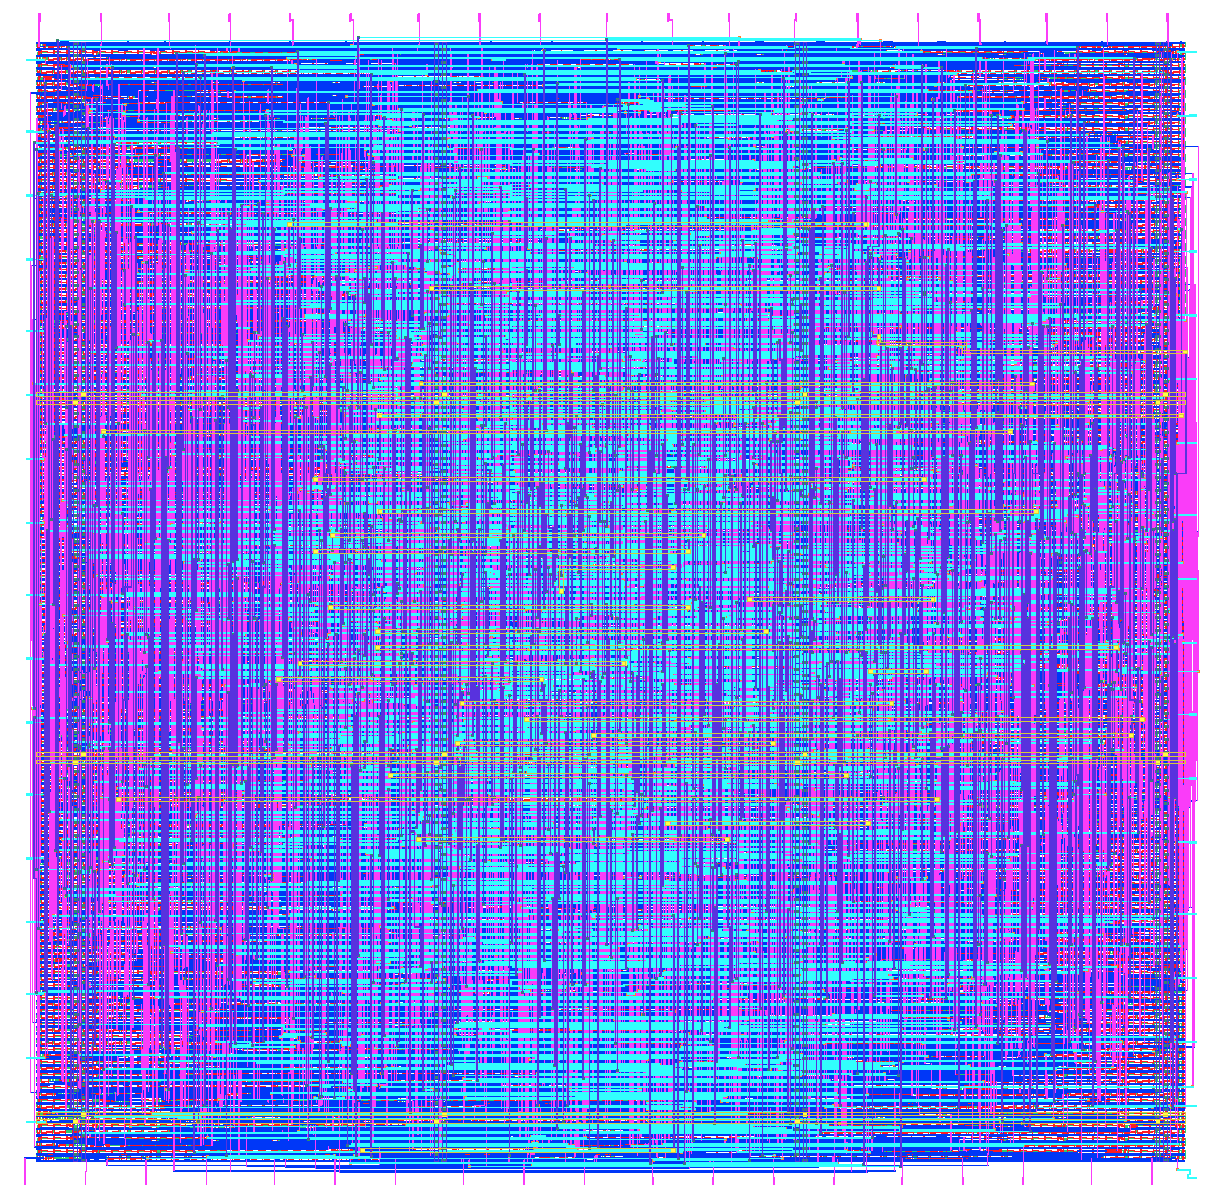

---
# 5. Summary

The modular inversion circuit has been designed based on the Bernstein-Yang algorithm, the current popular fast constant-time algorithm. Two designs were implemented, one with a fully manual design while the other one used XLS to auto-generate the "hdivstep" module. Both design target the inversion of 23-bit prime for ease of implementation.

The following table summarizes the key design results between the two designs. Both are used to calculate the modular inversion for the 23-bit prime. Note that the latency is added with the latency of 23-bit modular multiplication design which is assumed to be 8 clock cycles (ceil(115/15)=8). (Refer to appendix C for the implementationi of modular multiplicaion with DSLX.)

| Result Metrics | All Hand Design | Partly XLS Auto-generate Design |
| :-: | :-: | :-: |
| Latency (ns) | ~960 | ~1,024 |
| Clock Period (ns) | 15 | 16 |
| Cell Count | 1,310 | 1,223 |
| Design Area (um$^2$) | ~29,300 | ~27,500 |

The difference in the two designs' clock periods is likely due to the fact that the modular operation is written differently. The hand design computes the addition together with the addition and minus the modulo, so the latency should be lower while the area is bigger. This results in lower latency but a larger area in hand design. A similar result is likely to be achieved if the XLS code is written in the same way.

---
# Appendix A: 256-bit Modular Inversion Implementation

This appendix A shows the files prepared for 256-bit (NIST P256 prime) modular inverse module implementation.

Initially, the author would like to implement 256-bit modular inversion to have the results compared to other designs. However, the full Openlane flow has an error in [Step 17] that shows "child killed: kill signal" message, which suggests that [colab has not enough RAM](https://github.com/The-OpenROAD-Project/OpenLane/issues/1101) for the entire flow computation.

## A.1. RTL Files

### A.1.1. Write additional required files

In [47]:
%%writefile RTL/byinverse_256bit.v
`timescale 1ns / 1ps

module byinverse #(parameter BIT_LEN = 256, parameter MODULO = 256'hffffffff00000001000000000000000000000000ffffffffffffffffffffffff)(clk,rst,start,f_in,g_in,out,finish);
    input clk;
    input rst;
    input start;
    input [BIT_LEN-1:0] f_in;
    input [BIT_LEN-1:0] g_in;
    output reg [BIT_LEN-1:0] out;
    output reg finish;

    localparam ROUND = (45907 * BIT_LEN + 26313) / 19929;
    localparam BIT_i = $clog2(ROUND);

    reg [BIT_i-1:0] i;
    reg [BIT_i+1:0] delta; //delta can be negative
    wire [BIT_i+1:0] delta_out;
    reg [1:0] state;
    reg [BIT_LEN:0] f,g; //f,g can be negative
    reg [BIT_LEN-1:0] v,r;
    wire [BIT_LEN:0] f_out,g_out;
    wire [BIT_LEN-1:0] v_out,r_out;

    hdivstep #(.BIT_LEN(BIT_LEN),.BIT_i(BIT_i),.MODULO(MODULO)) hdivstep (.delta_in(delta),.f_in(f),.g_in(g),.v_in(v),.r_in(r),.delta_out(delta_out),.f_out(f_out),.g_out(g_out),.v_out(v_out),.r_out(r_out));

    always @(posedge clk or negedge rst) begin
        if(!rst) begin
            i <= 0;
            state <= 0;
            delta <= 0;
            f <= 0;
            g <= 0;
            v <= 0;
            r <= 0;
            out <= 0;
            finish <= 0;
        end else begin
            if (state == 0) begin
                if(start) begin
                    state <= 1;
                    i <= 0;
                    delta <= 1;
                    f <= f_in;
                    g <= g_in;
                    v <= 0;
                    r <= 1;
                    finish <= 0;
                end
            end else if(state==1) begin
                if(i<ROUND) begin
                    i <= i+1;
                    delta <= delta_out;
                    f <= f_out;
                    g <= g_out;
                    v <= v_out;
                    r <= r_out;
                end else begin
                    state <= 2;
                end
            end else if(state ==2) begin
                if(f[BIT_LEN]) begin //if f<0
                    out <= MODULO-v;
                end else begin
                    out <= v;
                end
                finish <= 1;
                state <= 0;
                i <= 0;
                delta <= 0;
                f <= 0;
                g <= 0;
                v <= 0;
                r <= 0;
            end
        end
    end
endmodule

Writing RTL/byinverse_256bit.v


### A.1.2. Behavioral Simulation

In [48]:
%%writefile SIM/tb_byinverse_256bit.v
`timescale 1ns / 1ps

`define M_TEST_CASE         30

module tb_byinverse();

    reg clk,rst;
    parameter PERIOD = 10;
    always #(PERIOD/2) clk = ~clk;

    parameter BIT_LEN = 256;
    parameter MODULO = 256'hffffffff00000001000000000000000000000000ffffffffffffffffffffffff;
    parameter EE_hdiv = 256'he0000000bffffffe200000037ffffffee0000000400000039ffffffde0000; // ROUND = (45907 * BIT_LEN + 26313) / 19929;

    reg start;
    wire finish;

    initial begin
      $dumpfile("simwaveform.vcd");
      $dumpvars(0,tb_byinverse);
    end

    parameter INPUT_BITLEN = BIT_LEN;
    parameter OUTPUT_BITLEN = BIT_LEN;
    parameter TEST_CASE = `M_TEST_CASE;
    parameter i_BITLEN = $clog2(TEST_CASE);

    reg [INPUT_BITLEN-1:0] inA;
    wire [OUTPUT_BITLEN-1:0] outA;
    reg [OUTPUT_BITLEN-1:0] outA_prev;
    wire out_change;
    reg [OUTPUT_BITLEN-1:0] out_diff;
    reg all_correct;
    assign out_change = (outA == outA_prev)? 0 : 1;
    always @(posedge clk) begin
        outA_prev <= outA;
    end

    reg [i_BITLEN-1:0] i;
    reg [INPUT_BITLEN-1:0] inputA_mem [0:TEST_CASE-1];
    reg [OUTPUT_BITLEN-1:0] outputA_mem [0:TEST_CASE-1];

    wire [2*OUTPUT_BITLEN-1:0] output_convert;
    wire [OUTPUT_BITLEN-1:0] output_convert2;

    assign output_convert = (outA*EE_hdiv)%MODULO;
    assign output_convert2 = output_convert[OUTPUT_BITLEN-1:0];

    byinverse #(.BIT_LEN(BIT_LEN),.MODULO(MODULO)) byinverse (.clk(clk),.rst(rst),.start(start),.f_in(MODULO),.g_in(inA),.out(outA),.finish(finish));

    initial begin
        clk = 0;
        rst = 0;
        inA = 0;
        start = 0;
        out_diff=0;
        all_correct = 1;
        $readmemh("/content/SIM/tb_inputA_dat_256bit.mem", inputA_mem);
        $readmemh("/content/SIM/tb_outputA_dat_256bit.mem", outputA_mem);
        #(PERIOD*5)
        rst = 1;
        #(PERIOD*5)
        for (i=0; i<TEST_CASE; i=i+1) begin
            #(PERIOD*5)
            start = 1;
            inA = inputA_mem[i];
            #(PERIOD)
            start = 0;
            wait(out_change);
            out_diff = output_convert2-outputA_mem[i];
            $display("Test case: 0x%0h, \tDifference: 0x%0h, \tOutput_convert2: 0x%0h, \tCorrect value: 0x%0h",i,out_diff,output_convert2,outputA_mem[i]);
            if (out_diff > 0) begin
                $display("Output is INCORRECT!!!!");
                all_correct = 0;
            end
        end

        #(PERIOD*10)
        if(all_correct==1) begin
            $display("All test cases are corrected");
        end else begin
            $display("Error!!!");
        end

        #(PERIOD*10)
        $finish;
    end

endmodule

Writing SIM/tb_byinverse_256bit.v


In [49]:
#After writing all the files, confirm the result with behavioral simulation
!iverilog -Wall -Winfloop -o SIM/sim_tb_byinverse_256bit -s tb_byinverse SIM/tb_byinverse_256bit.v RTL/byinverse_256bit.v RTL/hdivstep.v RTL/mod_add.v RTL/csa.v RTL/full_adder.v
!vvp SIM/sim_tb_byinverse_256bit

RTL/mod_add.v:19: warning: Port 3 (Cin) of csa expects 257 bits, got 260.
RTL/mod_add.v:19:        : Pruning 3 high bits of the expression.
RTL/mod_add.v:19: warning: Port 3 (Cin) of csa expects 257 bits, got 260.
RTL/mod_add.v:19:        : Pruning 3 high bits of the expression.
VCD info: dumpfile simwaveform.vcd opened for output.
Test case: 0x0, 	Difference: 0x0, 	Output_convert2: 0xba2b4d220a064c0c04617e557d46a662130f21622e1de328b702c70ddbc3fd1f, 	Correct value: 0xba2b4d220a064c0c04617e557d46a662130f21622e1de328b702c70ddbc3fd1f
Test case: 0x1, 	Difference: 0x0, 	Output_convert2: 0x3592fea8ea4e84b86a286dd70a0d904bd0063c4009d05eea75de497b4f8978e3, 	Correct value: 0x3592fea8ea4e84b86a286dd70a0d904bd0063c4009d05eea75de497b4f8978e3
Test case: 0x2, 	Difference: 0x0, 	Output_convert2: 0xa00e25f5ac64aa44a40ce35db5ceb6773e21ecf54a8aeb2ab3716828bb622d15, 	Correct value: 0xa00e25f5ac64aa44a40ce35db5ceb6773e21ecf54a8aeb2ab3716828bb622d15
Test case: 0x3, 	Difference: 0x0, 	Output_convert2: 0x6d7

## A.2. Run Openlane flow

In [50]:
DESIGN = 'byinverse'
%env DESIGN={DESIGN}
DESIGN_FILES = 'RTL/byinverse_256bit.v RTL/csa.v RTL/full_adder.v RTL/hdivstep.v RTL/mod_add.v'
%env DESIGN_FILES={DESIGN_FILES}

env: DESIGN=byinverse
env: DESIGN_FILES=RTL/byinverse_256bit.v RTL/csa.v RTL/full_adder.v RTL/hdivstep.v RTL/mod_add.v


In [51]:
%%writefile config.tcl
set ::env(DESIGN_NAME) $::env(DESIGN)

set ::env(VERILOG_FILES) $::env(DESIGN_FILES)

set ::env(CLOCK_TREE_SYNTH) 1
set ::env(CLOCK_PORT) "clk"
set ::env(CLOCK_NET) "clk"
set ::env(CLOCK_PERIOD) "100"

set ::env(PL_RANDOM_GLB_PLACEMENT) 1

set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 6000 6000"
set ::env(PL_TARGET_DENSITY) 0.70


set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6

set ::env(DIODE_INSERTION_STRATEGY) 3

# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

Overwriting config.tcl


In [52]:
!flow.tcl -design . -ignore_mismatches

OpenLane cb59d1f84deb5cedbb5b0a3e3f3b4129a967c988
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[WARNING]: OpenLane may not function properly: 'OL_INSTALL_DIR'
The version of open_pdks used in building the PDK does not match the version OpenLane was tested on (installed: a519523b0d9bc913a6f87a5eed083597ed9e2e93, tested: 3af133706e554a740cfe60f21e773d9eaa41838c)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
The version of magic used in building the PDK does not match the version OpenLane was tested on (installed: f0668447616c071f145d3d3fa1dfde9762b62b7b, tested: 94daf986ab9aa94a9ae2ac3539fa5def9bd2a1ac)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]:

## A.3. Post Design Flow

As all the implementation steps are not completed, only the netlist simulation is invoked to confirm the correctness of the synthesis step.

In [53]:
MOST_RECENT_RUN_PATH = sorted(os.listdir('runs'))[-1]
print(MOST_RECENT_RUN_PATH)

RUN_2022.11.20_05.41.20


In [54]:
%%writefile SIM/tb_byinverse_256bit_netlist.v
`timescale 1ns / 1ps

`define M_TEST_CASE         10

module tb_byinverse();

    reg clk,rst;
    parameter PERIOD = 10;
    always #(PERIOD/2) clk = ~clk;

    parameter BIT_LEN = 256;
    parameter MODULO = 256'hffffffff00000001000000000000000000000000ffffffffffffffffffffffff;
    parameter EE_hdiv = 256'he0000000bffffffe200000037ffffffee0000000400000039ffffffde0000; // ROUND = (45907 * BIT_LEN + 26313) / 19929;

    reg start;
    wire finish;

    initial begin
      $dumpfile("simwaveform.vcd");
      $dumpvars(0,tb_byinverse);
    end

    parameter INPUT_BITLEN = BIT_LEN;
    parameter OUTPUT_BITLEN = BIT_LEN;
    parameter TEST_CASE = `M_TEST_CASE;
    parameter i_BITLEN = $clog2(TEST_CASE);

    reg [INPUT_BITLEN-1:0] inA;
    wire [OUTPUT_BITLEN-1:0] outA;
    reg [OUTPUT_BITLEN-1:0] outA_prev;
    wire out_change;
    reg [OUTPUT_BITLEN-1:0] out_diff;
    reg all_correct;
    assign out_change = (outA == outA_prev)? 0 : 1;
    always @(posedge clk) begin
        outA_prev <= outA;
    end

    reg [i_BITLEN-1:0] i;
    reg [INPUT_BITLEN-1:0] inputA_mem [0:TEST_CASE-1];
    reg [OUTPUT_BITLEN-1:0] outputA_mem [0:TEST_CASE-1];

    wire [2*OUTPUT_BITLEN-1:0] output_convert;
    wire [OUTPUT_BITLEN-1:0] output_convert2;

    assign output_convert = (outA*EE_hdiv)%MODULO;
    assign output_convert2 = output_convert[OUTPUT_BITLEN-1:0];

    byinverse byinverse (.clk(clk),.rst(rst),.start(start),.f_in(MODULO),.g_in(inA),.out(outA),.finish(finish));

    initial begin
        clk = 0;
        rst = 0;
        inA = 0;
        start = 0;
        out_diff=0;
        all_correct = 1;
        $readmemh("/content/SIM/tb_inputA_dat_256bit.mem", inputA_mem);
        $readmemh("/content/SIM/tb_outputA_dat_256bit.mem", outputA_mem);
        #(PERIOD*5)
        rst = 1;
        #(PERIOD*5)
        for (i=0; i<TEST_CASE; i=i+1) begin
            #(PERIOD*5)
            start = 1;
            inA = inputA_mem[i];
            #(PERIOD)
            start = 0;
            wait(out_change);
            out_diff = output_convert2-outputA_mem[i];
            $display("Test case: 0x%0h, \tDifference: 0x%0h, \tOutput_convert2: 0x%0h, \tCorrect value: 0x%0h",i,out_diff,output_convert2,outputA_mem[i]);
            if (out_diff > 0) begin
                $display("Output is INCORRECT!!!!");
                all_correct = 0;
            end
        end

        #(PERIOD*10)
        if(all_correct==1) begin
            $display("All test cases are corrected");
        end else begin
            $display("Error!!!");
        end

        #(PERIOD*10)
        $finish;
    end

endmodule

Writing SIM/tb_byinverse_256bit_netlist.v


In [55]:
NL_PATH = 'runs/'+MOST_RECENT_RUN_PATH+"/results/synthesis/"+DESIGN+".v"
!iverilog -DFUNCTIONAL -DUNIT_DELAY=#1 -o SIM/sim_tb_byinverse_256bit_netlist -s tb_byinverse SIM/tb_byinverse_256bit_netlist.v {NL_PATH} {PATH_TO_TECH}/primitives.v {PATH_TO_TECH}/sky130_fd_sc_hd_fix.v
!vvp SIM/sim_tb_byinverse_256bit_netlist

VCD info: dumpfile simwaveform.vcd opened for output.
Test case: 0x0, 	Difference: 0x0, 	Output_convert2: 0xba2b4d220a064c0c04617e557d46a662130f21622e1de328b702c70ddbc3fd1f, 	Correct value: 0xba2b4d220a064c0c04617e557d46a662130f21622e1de328b702c70ddbc3fd1f
Test case: 0x1, 	Difference: 0x0, 	Output_convert2: 0x3592fea8ea4e84b86a286dd70a0d904bd0063c4009d05eea75de497b4f8978e3, 	Correct value: 0x3592fea8ea4e84b86a286dd70a0d904bd0063c4009d05eea75de497b4f8978e3
Test case: 0x2, 	Difference: 0x0, 	Output_convert2: 0xa00e25f5ac64aa44a40ce35db5ceb6773e21ecf54a8aeb2ab3716828bb622d15, 	Correct value: 0xa00e25f5ac64aa44a40ce35db5ceb6773e21ecf54a8aeb2ab3716828bb622d15
Test case: 0x3, 	Difference: 0x0, 	Output_convert2: 0x6d73bacf1fa093624d2529e97813f0d0bd516c844939a26806afaa997aee3ca0, 	Correct value: 0x6d73bacf1fa093624d2529e97813f0d0bd516c844939a26806afaa997aee3ca0
Test case: 0x4, 	Difference: 0x0, 	Output_convert2: 0xf9b4d9b15186eaf5d0c6bcbc56aab1126bf9b07b9a1a7cba8e67b3dac7eeaa41, 	Correct value

---
# Appendix B: Full Bernstein-Yang Modular Inversion in DSLX

Initially, a complete modular inversion module designed with DSLX is desired. However, as the for loop is unroll resulting in a huge circuit rendering the circuit not so practical for usage. So, the implementation is stopped midway.

## B.1. Bernstein-Yang Modular Inversion in DSLX

In [56]:
%%bash -c 'cat > DSLX/byinverse_w_wrapper.x; interpreter_main DSLX/byinverse_w_wrapper.x'
import std

fn byinverse_iter_cal(MOD_SZ: u32) -> u32 { (u32:45907 * MOD_SZ + u32:26313) / u32:19929 }
fn byinverse_iter_width(SZ: u32) -> u32 { std::clog2(SZ) }

fn hdivstep <MOD_SZ_P1: u32,MOD_SZ_P2: u32 = MOD_SZ_P1 + u32:1,DELTA_SZ: u32>(delta:sN[DELTA_SZ],f:sN[MOD_SZ_P1],g:sN[MOD_SZ_P1],v:uN[MOD_SZ_P1],r:uN[MOD_SZ_P1],prime:uN[MOD_SZ_P1]) -> (sN[DELTA_SZ],sN[MOD_SZ_P1],sN[MOD_SZ_P1],uN[MOD_SZ_P1],uN[MOD_SZ_P1]) {
  let d0 = ((g as uN[MOD_SZ_P1])[:1] & u1:1) & (delta > sN[DELTA_SZ]:0);
  let delta = if (d0) {-delta + sN[DELTA_SZ]:2} else {delta + sN[DELTA_SZ]:2};
  let f_temp = f;
  let f =  if (d0) { g } else { f };
  let g =  if (d0) { -f_temp } else { g };
  let v_temp = if (v > uN[MOD_SZ_P1]:0) {prime-v} else {v};
  let v =  if (d0) { r } else { v };
  let r =  if (d0) { v_temp } else { r };
  
  let g0 = (((g as uN[MOD_SZ_P1])[:1] & u1:1) == u1:1);
  let r = if (g0) {r+v} else {r};
  let v = v + v;
  let r = if(r>=prime) {r-prime} else {r};
  let v = if(v>=prime) {v-prime} else {v};
  let g_temp = if(g0) { g as sN[MOD_SZ_P2] +f as sN[MOD_SZ_P2] } else {g as sN[MOD_SZ_P2]};
  let g = (g_temp >> 1) as sN[MOD_SZ_P1];
  
  (delta,f,g,v,r)
}

fn byinverse <MOD_SZ: u32, MOD_SZ_P1: u32 = MOD_SZ + u32:1, MOD_SZ_P2: u32 = MOD_SZ + u32:2, CNT_SZ: u32 = byinverse_iter_width(byinverse_iter_cal(MOD_SZ)), DELTA_SZ: u32 = CNT_SZ + u32:2> (f_in: uN[MOD_SZ], g_in: uN[MOD_SZ]) -> (sN[DELTA_SZ],sN[MOD_SZ_P1],sN[MOD_SZ_P1],uN[MOD_SZ],uN[MOD_SZ]) {
  let prime = f_in as uN[MOD_SZ_P1];
  let delta = sN[DELTA_SZ]:1;
  let f = f_in as sN[MOD_SZ_P1];
  let g = g_in as sN[MOD_SZ_P1];
  let v = uN[MOD_SZ_P1]:0;
  let r = uN[MOD_SZ_P1]:1;

  let ROUND = byinverse_iter_cal(MOD_SZ) as uN[CNT_SZ];

  let (delta,f,g,v,r) = for (i, (delta,f,g,v,r)): (uN[CNT_SZ], (sN[DELTA_SZ],sN[MOD_SZ_P1],sN[MOD_SZ_P1],uN[MOD_SZ_P1],uN[MOD_SZ_P1])) in range(uN[CNT_SZ]:0, ROUND) {
    let (delta,f,g,v,r) = hdivstep(delta,f,g,v,r,prime);
    (delta,f,g,v,r)
  }((delta,f,g,v,r));

  let v = if (f>sN[MOD_SZ_P1]:0) { v } else {prime-v};
  (delta,f,g,v as uN[MOD_SZ],r as uN[MOD_SZ])
}

fn byinverse23 (inp:u23) -> u23 {
  let (_,_,_,v,_) = byinverse(u23:4206593,inp);
  v
}

fn byinverse32 (inp:u32) -> u32 {
  let (_,_,_,v,_) = byinverse(u32:4294957057,inp);
  v
}

fn byinverse256 (inp:uN[256]) -> uN[256] {
  let (_,_,_,v,_) = byinverse(uN[256]:0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff,inp);
  v
}

fn byinverse381 (inp:uN[381]) -> uN[381] {
  let (_,_,_,v,_) = byinverse(uN[381]:0x1A0111EA397FE69A4B1BA7B6434BACD764774B84F38512BF6730D2A0F6B0F6241EABFFFEB153FFFFB9FEFFFFFFFFAAAB,inp);
  v
}

#[test]
fn byinverse23_test() {
  let _= assert_eq(u23:850519,byinverse23(u23:2724423));
  let _= assert_eq(u23:1224026,byinverse23(u23:3258756));
  let _= assert_eq(u23:1592419,byinverse23(u23:60732));
  let _= assert_eq(u23:3325948,byinverse23(u23:2415136));
  _
}

#[test]
fn byinverse32_test() {
  let _= assert_eq(u32:2711228651,byinverse32(u32:2841342116));
  let _= assert_eq(u32:2971542437,byinverse32(u32:1625697327));
  let _= assert_eq(u32:3891073821,byinverse32(u32:1897499313));
  let _= assert_eq(u32:1246444528,byinverse32(u32:3636766114));
  _
}

#[test]
fn byinverse256_test() {
  let _= assert_eq(uN[256]:29473326114196673764976211609009194982837374493936929604966415079852913224276, byinverse256(uN[256]:62204821606984285821019328561178945592089889066342417327930098705308772598012));
  let _= assert_eq(uN[256]:31672993755810900567709127047148862627030360764918443050416446897337254759610, byinverse256(uN[256]:32571146686236624447198955079409185875265070393957705822845073036974398609874));
  let _= assert_eq(uN[256]:85045510987308162822721663177348222806155377186989244076644514702952535517579, byinverse256(uN[256]:48379047030329594337053559773241414452014433408025603061231763799478348569619));
  let _= assert_eq(uN[256]:88947708573798094097897595523754938331226603440902957332538615016920358272316, byinverse256(uN[256]:111084387406109674405984684343145161925317982025905033915859978228213587561379));
  _
}

#[test]
fn byinverse381_test() {
  let _= assert_eq(uN[381]:0x0DC0DE7F230849735277F92F666AA2DF740796C2BA911722C824A6536EEBFEBB5D11D559E8412F1593DE069C41092D97,byinverse381(uN[381]:1033110963219560991640713160090731546207461411887836069458949865298949591780827777038949023072167425815179316027628));
  let _= assert_eq(uN[381]:0x11474DEBF529E7AE6324EB2A9DC81A2C42842133289B898DB1EBE7D3E3BAB0214E8EB1EE6F2AEDBE1BAA128F96370B1F,byinverse381(uN[381]:546447046537223382845726283443438037733478191597914123107665477638912573347195672421137774028655899502383934086347));
  let _= assert_eq(uN[381]:0x173EBA33C91AB65BD66DDFA6D947E3E59B580F9A567FA46A527C3A953EAFDBAC6927249D8B87B888E2BAE2EB09FE21D9,byinverse381(uN[381]:1862909343802745739940770655832153310778329704612876681454472602224264213884198917123747243149743016522670897032523));
  let _= assert_eq(uN[381]:0x12C53407537E23C78772DA4959947AF78AA811C1E8F8E298B83BF291181B98C7B813EFFD79229836980C50B16BDAE1E0,byinverse381(uN[381]:575876014554317720658979010687513805399319391473298245772755508875784524462672004162954341550470547655431977588085));
  _
}

[ RUN UNITTEST  ] byinverse23_test
[            OK ]
[ RUN UNITTEST  ] byinverse32_test
[            OK ]
[ RUN UNITTEST  ] byinverse256_test
[            OK ]
[ RUN UNITTEST  ] byinverse381_test
[            OK ]
[===============] 4 test(s) ran; 0 failed; 0 skipped.


Note that the function here does not directly output the inverse value, but the value needs to modular multiplied with the precomputed value. The correctness of the test function is shown below.

In [57]:
# 23 bit
prime = ALL_PRIME["PRIME_23bit"]
precompute_value, _ = find_precompute(prime)
assert (850519*2724423*precompute_value % prime == 1)
assert (1224026*3258756*precompute_value % prime == 1)
assert (1592419*60732*precompute_value % prime == 1)
assert (3325948*2415136*precompute_value % prime == 1)

# 32 bit
prime = ALL_PRIME["PRIME_32bit"]
precompute_value, _ = find_precompute(prime)
assert (2711228651*2841342116*precompute_value % prime == 1)
assert (2971542437*1625697327*precompute_value % prime == 1)
assert (3891073821*1897499313*precompute_value % prime == 1)
assert (1246444528*3636766114*precompute_value % prime == 1)

# 256 bit
prime = ALL_PRIME["PRIME_NIST_P256"]
precompute_value, _ = find_precompute(prime)
assert (29473326114196673764976211609009194982837374493936929604966415079852913224276*62204821606984285821019328561178945592089889066342417327930098705308772598012*precompute_value % prime == 1)
assert (31672993755810900567709127047148862627030360764918443050416446897337254759610*32571146686236624447198955079409185875265070393957705822845073036974398609874*precompute_value % prime == 1)
assert (85045510987308162822721663177348222806155377186989244076644514702952535517579*48379047030329594337053559773241414452014433408025603061231763799478348569619*precompute_value % prime == 1)
assert (88947708573798094097897595523754938331226603440902957332538615016920358272316*111084387406109674405984684343145161925317982025905033915859978228213587561379*precompute_value % prime == 1)

# 381 bit
prime = ALL_PRIME["PRIME_BLS12_381"]
precompute_value, _ = find_precompute(prime)
assert (0x0DC0DE7F230849735277F92F666AA2DF740796C2BA911722C824A6536EEBFEBB5D11D559E8412F1593DE069C41092D97*1033110963219560991640713160090731546207461411887836069458949865298949591780827777038949023072167425815179316027628*precompute_value % prime == 1)
assert (0x11474DEBF529E7AE6324EB2A9DC81A2C42842133289B898DB1EBE7D3E3BAB0214E8EB1EE6F2AEDBE1BAA128F96370B1F*546447046537223382845726283443438037733478191597914123107665477638912573347195672421137774028655899502383934086347*precompute_value % prime == 1)
assert (0x173EBA33C91AB65BD66DDFA6D947E3E59B580F9A567FA46A527C3A953EAFDBAC6927249D8B87B888E2BAE2EB09FE21D9*1862909343802745739940770655832153310778329704612876681454472602224264213884198917123747243149743016522670897032523*precompute_value % prime == 1)
assert (0x12C53407537E23C78772DA4959947AF78AA811C1E8F8E298B83BF291181B98C7B813EFFD79229836980C50B16BDAE1E0*575876014554317720658979010687513805399319391473298245772755508875784524462672004162954341550470547655431977588085*precompute_value % prime == 1)

## B.2. Conversion from DSLX to Verilog (for 23-bit prime)

In [58]:
DSLX_DESIGN = 'byinverse23'
DSLX_DESIGN_FILE = 'byinverse_w_wrapper'
%env DSLX_DESIGN={DSLX_DESIGN}
%env DSLX_DESIGN_FILE={DSLX_DESIGN_FILE}

env: DSLX_DESIGN=byinverse23
env: DSLX_DESIGN_FILE=byinverse_w_wrapper


In [59]:
!ir_converter_main --top={DSLX_DESIGN} DSLX/{DSLX_DESIGN_FILE}.x > DSLX/{DSLX_DESIGN}.ir
!opt_main DSLX/{DSLX_DESIGN}.ir > DSLX/{DSLX_DESIGN}_opt.ir
#!cat DSLX/{DSLX_DESIGN}_opt.ir

In [60]:
!codegen_main --use_system_verilog=false --module_name={DSLX_DESIGN} --generator=combinational DSLX/{DSLX_DESIGN}_opt.ir > DSLX/{DSLX_DESIGN}_comb.v
!cat DSLX/{DSLX_DESIGN}_comb.v

module byinverse23(
  input wire [22:0] inp,
  output wire [22:0] out
);
  wire d0;
  wire [23:0] g;
  wire [23:0] g__2;
  wire [24:0] sign_ext_9611;
  wire [24:0] add_9613;
  wire [23:0] g_temp__1;
  wire [23:0] f__2;
  wire d0__1;
  wire [7:0] delta__2;
  wire [23:0] g__3;
  wire [23:0] f__3;
  wire [7:0] neg_9632;
  wire [24:0] sign_ext_9633;
  wire [1:0] add_9636;
  wire [24:0] add_9639;
  wire [6:0] add_9641;
  wire g0__1;
  wire [6:0] sel_9645;
  wire [23:0] g_temp__2;
  wire [7:0] delta__3;
  wire d0__2;
  wire [23:0] g__4;
  wire [23:0] f__4;
  wire [7:0] neg_9656;
  wire [24:0] sign_ext_9657;
  wire [24:0] add_9662;
  wire [6:0] add_9663;
  wire [6:0] add_9664;
  wire g0__2;
  wire [6:0] sel_9668;
  wire [23:0] g_temp__3;
  wire [7:0] delta__4;
  wire d0__3;
  wire [23:0] g__5;
  wire [23:0] f__5;
  wire [7:0] neg_9679;
  wire [24:0] sign_ext_9680;
  wire [24:0] add_9685;
  wire [6:0] add_9686;
  wire [6:0] add_9687;
  wire g0__3;
  wire [6:0] sel_9691;
  wire [23:0] g_temp__4

## B.3. Behavioral Simulation

In [61]:
%%writefile SIM/tb_byinverse_23bit_dslx_full.v
`timescale 1ns / 1ps

`define M_TEST_CASE         100

module tb_byinverse();

    reg clk,rst;
    parameter PERIOD = 10;
    always #(PERIOD/2) clk = ~clk;

    parameter BIT_LEN = 23;
    parameter MODULO = 23'd4206593;
    parameter EE_hdiv = 23'd3529182; // ROUND = (45907 * BIT_LEN + 26313) / 19929;

    reg start;
    wire finish;

    initial begin
      $dumpfile("simwaveform.vcd");
      $dumpvars(0,tb_byinverse);
    end

    parameter INPUT_BITLEN = BIT_LEN;
    parameter OUTPUT_BITLEN = BIT_LEN;
    parameter TEST_CASE = `M_TEST_CASE;
    parameter i_BITLEN = $clog2(TEST_CASE);

    reg [INPUT_BITLEN-1:0] inA;
    wire [OUTPUT_BITLEN-1:0] outA;
    reg [OUTPUT_BITLEN-1:0] outA_prev;
    wire out_change;
    reg [OUTPUT_BITLEN-1:0] out_diff;
    reg all_correct;
    assign out_change = (outA == outA_prev)? 0 : 1;
    always @(posedge clk) begin
        outA_prev <= outA;
    end

    reg [i_BITLEN-1:0] i;
    reg [INPUT_BITLEN-1:0] inputA_mem [0:TEST_CASE-1];
    reg [OUTPUT_BITLEN-1:0] outputA_mem [0:TEST_CASE-1];

    wire [2*OUTPUT_BITLEN-1:0] output_convert;
    wire [OUTPUT_BITLEN-1:0] output_convert2;

    assign output_convert = (outA*EE_hdiv)%MODULO;
    assign output_convert2 = output_convert[OUTPUT_BITLEN-1:0];

    byinverse23 byinverse23 (.inp(inA),.out(outA));

    initial begin
        clk = 0;
        rst = 0;
        inA = 0;
        start = 0;
        out_diff=0;
        all_correct = 1;
        $readmemh("/content/SIM/tb_inputA_dat_23bit.mem", inputA_mem);
        $readmemh("/content/SIM/tb_outputA_dat_23bit.mem", outputA_mem);
        #(PERIOD*5)
        rst = 1;
        #(PERIOD*5)
        for (i=0; i<TEST_CASE; i=i+1) begin
            #(PERIOD*5)
            start = 1;
            inA = inputA_mem[i];
            #(PERIOD)
            start = 0;
            #(PERIOD)
            out_diff = output_convert2-outputA_mem[i];
            $display("Test case: 0x%0h, \tDifference: 0x%0h, \tOutput_convert2: 0x%0h, \tCorrect value: 0x%0h",i,out_diff,output_convert2,outputA_mem[i]);
            if (out_diff > 0) begin
                $display("Output is INCORRECT!!!!");
                all_correct = 0;
            end
        end

        #(PERIOD*10)
        if(all_correct==1) begin
            $display("All test cases are corrected");
        end else begin
            $display("Error!!!");
        end

        #(PERIOD*10)
        $finish;
    end

endmodule

Writing SIM/tb_byinverse_23bit_dslx_full.v


In [62]:
!iverilog -Wall -Winfloop -o SIM/sim_tb_byinverse_23bit_dslx_full -s tb_byinverse SIM/tb_byinverse_23bit_dslx_full.v DSLX/byinverse23_comb.v
!vvp SIM/sim_tb_byinverse_23bit_dslx_full

DSLX/byinverse23_comb.v:1: warning: timescale for byinverse23 inherited from another file.
SIM/tb_byinverse_23bit_dslx_full.v:1: ...: The inherited timescale is here.
VCD info: dumpfile simwaveform.vcd opened for output.
Test case: 0x0, 	Difference: 0x0, 	Output_convert2: 0x2e4653, 	Correct value: 0x2e4653
Test case: 0x1, 	Difference: 0x0, 	Output_convert2: 0x1eae97, 	Correct value: 0x1eae97
Test case: 0x2, 	Difference: 0x0, 	Output_convert2: 0x51679, 	Correct value: 0x51679
Test case: 0x3, 	Difference: 0x0, 	Output_convert2: 0x280043, 	Correct value: 0x280043
Test case: 0x4, 	Difference: 0x0, 	Output_convert2: 0x2d58d7, 	Correct value: 0x2d58d7
Test case: 0x5, 	Difference: 0x0, 	Output_convert2: 0xf7f42, 	Correct value: 0xf7f42
Test case: 0x6, 	Difference: 0x0, 	Output_convert2: 0x2ffdd0, 	Correct value: 0x2ffdd0
Test case: 0x7, 	Difference: 0x0, 	Output_convert2: 0x269bab, 	Correct value: 0x269bab
Test case: 0x8, 	Difference: 0x0, 	Output_convert2: 0x1b6f30, 	Correct value: 0x1b6f30


## B.4. Conversion Evaluation

Although the autogenerated Verilog file from DSLX has been confirmed to compute the desired output, the generated Verilog files are purely dataflow which would be hard to use in normal circumstances.

It can be observed that the XLS tools unroll the loop to become all dataflow as the "combinational" flag dictated. With the repetition of iterations in the algorithm, each loop is connected to one another, resulting in an undesirable, colossal circuit.

So, the full auto-generated from the DSLX design implementation attempt is stopped here.

# Appendix C: Modular Multiplication with DSLX

In [7]:
!mkdir APPEN_C

Since modular multiplication is required for the last step of modular inversion, modular multiplication is implemented with DSLX to estimate the approximate latency.

This modular multiplication is implemented with basic multiplication and Barrett's reduction. Because Barrett's reduction was introduced long time ago in 1986, it can be expected that there are more optimized designs for modular multiplication design.

Again, while the module is all parameterized, the design is implemented for 23-bit modular multiplication with the same previous prime value (4,206,593).

## C.1. Write Modular Multiplication with DSLX

In [8]:
%%bash -c 'cat > APPEN_C/mod_mul_barrett.x; interpreter_main APPEN_C/mod_mul_barrett.x'

fn find_mu<MOD_SZ:u32,MOD_SZ_P1:u32 = MOD_SZ+u32:1>(prime:uN[MOD_SZ]) -> uN[MOD_SZ_P1] { 
  let pow = uN[MOD_SZ+MOD_SZ+u32:1]:1 << (MOD_SZ*u32:2);
  let mu = pow/prime as uN[MOD_SZ+MOD_SZ+u32:1];
  mu as uN[MOD_SZ_P1]
}

fn barrett_reduc<MOD_SZ:u32,INP_SZ:u32>(prime:uN[MOD_SZ],inp:uN[INP_SZ]) -> uN[MOD_SZ] {
  let mu = find_mu(prime);
  let inp_shift = inp >> (MOD_SZ-u32:1);
  let (y1,y2) = umulp((inp_shift as uN[MOD_SZ*u32:2 + u32:1]), (mu as uN[MOD_SZ*u32:2 + u32:1]));
  let y = y1+y2;
  let y_shift = y >>(MOD_SZ+u32:1);
  let (z_hat1,z_hat2) = umulp(y_shift as uN[INP_SZ], prime as uN[INP_SZ]);
  let z_hat = z_hat1+z_hat2;
  let ans = inp-z_hat;
  let ans_Mi_P = ans as uN[MOD_SZ+u32:2] - prime as uN[MOD_SZ+u32:2];
  let ans_Mi_2P = ans as uN[MOD_SZ+u32:2] - prime as uN[MOD_SZ+u32:2] - prime as uN[MOD_SZ+u32:2];
  let ans_adjust1 = if(ans as uN[MOD_SZ+u32:2] < ans_Mi_P) { ans as uN[MOD_SZ+u32:2] } else { ans_Mi_P };
  let ans_adjust2 = if(ans_adjust1 < ans_Mi_2P) { ans_adjust1 } else { ans_Mi_2P };
  ans_adjust2 as uN[MOD_SZ]
}

fn mod_mul<SZ:u32>(prime:uN[SZ],inp1:uN[SZ],inp2:uN[SZ]) -> uN[SZ] {
  let (prod1,prod2) = umulp(inp1 as uN[SZ*u32:2], inp2 as uN[SZ*u32:2]);
  let prod = prod1 + prod2;
  let reduc = barrett_reduc(prime,prod);
  reduc
}

fn mod_mul_wrap23(inp1:uN[23],inp2:uN[23]) -> uN[23] {
  let res = mod_mul(uN[23]:4206593,inp1,inp2);
  res
}

#[test]
fn barrett_reduc_test() {
  let _= assert_eq(uN[23]:0x362d6,barrett_reduc(uN[23]:0x403001,uN[46]:0x2eba6e8d8b5));
  let _= assert_eq(uN[23]:0x31b2d4,barrett_reduc(uN[23]:0x403001,uN[46]:0xe690c1eebe8));
  let _= assert_eq(uN[32]:0x56c3e2d3,barrett_reduc(uN[32]:0xffffd801,uN[64]:0x7606e6dfb5d65c23));
  let _= assert_eq(uN[32]:0xf8d334ce,barrett_reduc(uN[32]:0xffffd801,uN[64]:0xf8f4d9ca3e0f4d8));
  let _= assert_eq(uN[254]:0xbbab3ba0c871bb106c4d9efd6e82276989e776384c586d1a3f3f71b883486d0,barrett_reduc(uN[254]:0x2523648240000001ba344d80000000086121000000000013a700000000000013,uN[508]:0x1acb0ca619a34fd7e45676aab799d7e94022574741e573c9497e44f7a5469b9a8d13aa4ecb3db5ace37a6546275d8379842a82986525737ecda609470b35cf8));
  let _= assert_eq(uN[254]:0x1599a50449c81fc525688babf01f2326118b70f3a67652d393e6bbe673419ea4,barrett_reduc(uN[254]:0x2523648240000001ba344d80000000086121000000000013a700000000000013,uN[508]:0x35e7d32c41adbb7d3cc86d099e0a15085964367d11658050f744375725a7c6d4f43dbbaa4b7e80a004512a43c79a22859d14765d50b092cd1031d70563a3080));
  let _= assert_eq(uN[255]:0x619893c8aa7a60996ef446f77042aa332af6607dd17b3480e9049e0f528b5975,barrett_reduc(uN[255]:0x7fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffed,uN[510]:0x35e56aaa8f7e887507baeea2ad4e13c69d8c971838dc24674ec60e53b1855baa618abe775db21f3a4934dad1b6abbab7c817f2e560cdcd2b379e7da2f8bfbd09));
  let _= assert_eq(uN[255]:0x72cb05c115cd0dd0aec6157cb3cdbb9686b23fbea1b6e01db3d3f3961be010e0,barrett_reduc(uN[255]:0x7fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffed,uN[510]:0x1f4a810ae51f908e97fb2c8905624a05d2cb7d7a7b3a94ac3cad19a0c98765ae4dbbde23131d98a61f7d7925e736beb93c7d9f905704ce8cb22225b831c6f861));
  let _= assert_eq(uN[256]:0xf43194d22b88965b5b55fa5404663e949458cf0335bdbcc67ced342359134442,barrett_reduc(uN[256]:0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffefffffc2f,uN[512]:0x8b2addd89540bc7bdbf00c62a0a3f7802dcd3aea370dabcddf6e06c955376016405830c4b38935465b92be6cc4d5737b910d4b593b23094ae9a30bb1021d0071));
  let _= assert_eq(uN[256]:0x78404050bbbb41c457233848caa5c6f6aa81a0f08de034400a203bd58eabe2a9,barrett_reduc(uN[256]:0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffefffffc2f,uN[512]:0x47cd01c017b2fd38a7a8b8e5294aa67aaccd4817abe441689b8589f09adc788c5b2994fda1fa23a752eeef3b87f324b1832d3d30f03d0a159ed3502685dc10eb));
  let _= assert_eq(uN[256]:0x4d7ccc612e33e05c6f6d6b153652c4126128fccae8972947647bf951a4a8a907,barrett_reduc(uN[256]:0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff,uN[512]:0x8b7cfe5fad287c9ffa85a2fd4650c545312418d78a22cabfe89a82b1336eebed73b4312c3144395f4fdb11127a3ac45f1f400a94607b63ad6b3a8f22a7c23821));
  let _= assert_eq(uN[256]:0xe1a9814e940028255e081c74a10c341c5988fd56a4dba949ccab99b9ebcb29b9,barrett_reduc(uN[256]:0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff,uN[512]:0x86b97a3d6a2583c9d4fa76f284b8fc6474c672dae19a57c77ba9a2007352c7fa8a3e8893621e9b55af6f7760e0c3c36d07458c1f145453a1b9fa1150356e29b9));
  let _= assert_eq(uN[384]:0xee853ebba6ab0409a1f70df7e53698f8354548ec0c0cb64b3da966aeab439bd4e818cea0cc28b15f067435bed4b506fc,barrett_reduc(uN[384]:0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffeffffffff0000000000000000ffffffff,uN[768]:0x680625a370374fc771ff6927eb00fc26ca3c6200d6ab86dc074bcf5c31c0f38961ca623d9d488994d1ffef4ee48acaf841790ab8078b348d3d014abe8b653bec4622f25bfd5677ea3e61e39eb5977d4bba493b1c0ad95a9d2bc29823fb2ffc59));
  let _= assert_eq(uN[384]:0x35795b4458f56ce5d079519fb0e351ee4ef433168d5f06dc5c32240301c17c624715d56dc404b4c7cc222bd8d4fa7bf5,barrett_reduc(uN[384]:0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffeffffffff0000000000000000ffffffff,uN[768]:0x7227eb0f45f6afcecb594cf48ee8514d49f9e418ecfabd5b95cd572fa5d08603c5007e523fadf8a4bb6db206d45cf4653065ea9da76368971140416d3057078614fc1cf3073ca3cba7ab108b09e5095e4b4357f698f5d00ebbdb24a71883d45d));
  let _= assert_eq(uN[381]:0x19e3f0c818ea750154456209db142a97c215518ff19bddef53bebba0c247b30201d45b21720279bce6015ecc7fe8999a,barrett_reduc(uN[381]:0x1a0111ea397fe69a4b1ba7b6434bacd764774b84f38512bf6730d2a0f6b0f6241eabfffeb153ffffb9feffffffffaaab,uN[762]:0x2639250df91a92996817608af154e40fe7d8dbd0981fc07899feb4a291b6015fd542d89adef1188d70a32edd8b75e63f68e9fcb5903883e339e561a04e73304b899ff7a7eadbbc18bee6b6ba1d11f004af24be81a39da6234b03275be1d9ef));
  let _= assert_eq(uN[381]:0x627c4cf1a088b26de46284abc1b8a58584d9baf30f106ef4a05225605db19b00a5399d9944c579617a3cebd081defda,barrett_reduc(uN[381]:0x1a0111ea397fe69a4b1ba7b6434bacd764774b84f38512bf6730d2a0f6b0f6241eabfffeb153ffffb9feffffffffaaab,uN[762]:0x2245c6a7cb5bb123dc7d66d6a7915b78a893ebdc63341daf54c69564cb36c3a37da5c5848256bff8a51b5207890e97b3da84e471e03898a38dedc26bc53fc0575883fdba12c087ef2d504e6d7b0652a4bebca5e5df902082910cb72b8b62406));
  let _= assert_eq(uN[509]:0x142e95a39af894e50066f7632246a57e4404861785defa482cf7f2dbdbed0500baed4d0189c48f6464da5cdf5aa4e1125fb81b9eeabb19c51055b3e13c9e275f,barrett_reduc(uN[509]:0x155556ffff39ca9bfcedf2b4f9c0ecf6cb8ac8495d187e8c32ea0103e01090bb626e85bf7c18a0f0cfcb5c6071bad3d2ee63bd076e8d9300a13d118db8bfd2ab,uN[1018]:0xc9ad6a2874d9dae3237450b0fdb212248bfadd606688ad4ee5a854606da25c88830f72ba34be9573012f75089cea693db2784cc9256988373ca46d3413a24449ee90cb1ae84e9d14df961e9ad0f04eaadedf4210248dddc1b7d317db490fbf210eaab2c80df321fbb52c9eb0150b61f56947fe63ab633cf27c820a1d57e9f7));
  let _= assert_eq(uN[509]:0x64d3e1b90f1b8e1b66483ecb568bd5caaefc19acc4056e3d0903d58efc6bc80f08246d126e65284e05089cc58cdd2cf5d3afdbd0593a5a470107406fddf623f,barrett_reduc(uN[509]:0x155556ffff39ca9bfcedf2b4f9c0ecf6cb8ac8495d187e8c32ea0103e01090bb626e85bf7c18a0f0cfcb5c6071bad3d2ee63bd076e8d9300a13d118db8bfd2ab,uN[1018]:0x1ac6101c8fa46a0a2a891fdb1b0a17bc17e9c54f9e5def2a777ef4b794b3f7b0d9a5b00426601891ecf45d7920fda3a9d3743ff426a4e903dd874e0610cf56aa3ddf80518a483ef10675290f3108057be756ecbd4aed3dc7eaf316e1ac6d8526170c880e539a0cef68bb493b336122b14db2835b59722476a67c2693617c950));
  let _= assert_eq(uN[521]:0x18457d7bc5e606a78766c7f2529aaf1d26864a9f0401f0483b904888c63fd74db1573993a5ba818e411a873ba62bb616fa6e628fc9326f21018ef1652257e9141d,barrett_reduc(uN[521]:0x1ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff,uN[1042]:0x3a4cd78f639821d4cc606ac106fdfeaf39676dd5a0ceac8ff2e644e068e57f673b7f20e93d36e1d6e2b19efb4fd43a447885c2b975ebf606811a57b476e81c0e0b845dec100a924f801246371ea1aaab9a35b4adbf1fd8c8bc8a45e21857f13dc13d55e3249bc0372d72b8d8f612789e3f336404cc419d2beecf8bc33c16b1708a3c0));
  let _= assert_eq(uN[521]:0x1f08b5c16d8823fe0b815cd1c9deb8f4b3e58f3ce92a133c962ca24cc4e01acb8625cd63da7a0c6aa38960ab0cc0fa76186cc4e7e4e0fff8abb1ad344affbf9182,barrett_reduc(uN[521]:0x1ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff,uN[1042]:0x276a4b03e67eec727d3194aaa4681a97f189a7aa05bb3f8d69c2a6c81d9fe8d71b2e3ca9462fd8c21329a099186e16c2e3e6aa07c3e344ddffd48c5b894e0768754e3b65da23990c06a21f4b77ca69de435279851ecbb5016d148176c0bd7e0d412acb3e819a8fb465a0a3c5be24950445ef93774a9c5c6d908ad0d4a58008f844dd7));
  _
}

#[test]
fn mod_mul_test() {
  let _= assert_eq(uN[23]:0x10c522,mod_mul(uN[23]:0x403001,uN[23]:0x283fc3,uN[23]:0x858a4));
  let _= assert_eq(uN[23]:0x12fe62,mod_mul(uN[23]:0x403001,uN[23]:0x392b13,uN[23]:0xc23f9));
  let _= assert_eq(uN[32]:0xde1010e9,mod_mul(uN[32]:0xffffd801,uN[32]:0xf251f2fc,uN[32]:0x2a2ec529));
  let _= assert_eq(uN[32]:0x6ce6767e,mod_mul(uN[32]:0xffffd801,uN[32]:0xb83e0fc7,uN[32]:0xd3b7232d));
  let _= assert_eq(uN[254]:0x18777eb28443ea9948aff927bfa66ebcb06b58b5dd952dd257822acf2db48c18,mod_mul(uN[254]:0x2523648240000001ba344d80000000086121000000000013a700000000000013,uN[254]:0xcc3c0cf2e716adcd88d95a85226c4604c691cb6e03a6b19fc2c9ae3c077d4ba,uN[254]:0x66a4e875a3dbf59f2d03cbb4398f877cbd148a08465b9f8f34d43f98f53e099));
  let _= assert_eq(uN[254]:0x20899cb4df9a81cd27a74b1b368ce436f874d3656a26c43e7fde6fae7be6bcf0,mod_mul(uN[254]:0x2523648240000001ba344d80000000086121000000000013a700000000000013,uN[254]:0x6f67938e1e3bc552939ae7cc7b932eed26ceded0f8aeb8ec84b25b748a9cda1,uN[254]:0x183bc2d30f542b618bea11ee450e21bb4963c62e1a38c7ce94febca2b74b2722));
  let _= assert_eq(uN[255]:0x4f689eaca466d63f671e8016955d1ddb638302d7a29d7c5fabf3d9794725a45f,mod_mul(uN[255]:0x7fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffed,uN[255]:0x7146e69e101441848a1add55efa59c03f8f1e742a0196084560f3d2d469022a8,uN[255]:0x39e4628946c048d88932b312ab1198d928eec8c40d6f449497d6c13ec2687e66));
  let _= assert_eq(uN[255]:0x7f0ff19f1abf94f59d33190188120ff53a8a26dcca3fafef0bd73bfe414348a9,mod_mul(uN[255]:0x7fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffed,uN[255]:0x5df19802c48f7d67da96f69077b52c0ddfd7a6227379ace4a666dd3bb645db0a,uN[255]:0x61dc4339f350e760b5bb715a883fef92d0486d721569b494d259f87455b7ac1));
  let _= assert_eq(uN[256]:0x3a361e3f606379e92a5cba916f511d5fe165baa6f95d81bc891fbae1863b0159,mod_mul(uN[256]:0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffefffffc2f,uN[256]:0x7b32a76baea56c7031331df567a74b3a90fd8d51f031de230559909d2c175eb6,uN[256]:0x8b1651ed999ba34e940250781e388da9b37fced6b64480cb34be9d434d01da83));
  let _= assert_eq(uN[256]:0x1261473626cea45ca9dee84756253d6f3235a13f4e3f207b96aec74c8b1ac40f,mod_mul(uN[256]:0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffefffffc2f,uN[256]:0xef787a78c7687d430afed2d986c1bf5083c5f4cfe07d5136acc7753ee410ca5c,uN[256]:0xa7e73b943ec606d28eb377543949213753e33d33d7bad8c7ce6cc67de12a538e));
  let _= assert_eq(uN[256]:0x981b39aeb8f5c844d47cb758e9c08aea44dd50c9c8605f0ab81cf73ba1dbcb95,mod_mul(uN[256]:0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff,uN[256]:0x727695a2e94626095033745aef3f2e6ec11f733cca94549239bfb4af6346ab83,uN[256]:0x576fd0c4d69c4c5e4967b9232290ad0bc66ecba9d628ca22102346af4869ca59));
  let _= assert_eq(uN[256]:0x150699b7a5de2419dd5d66ad44ab027f8fdfb2ec291a812513e0037995783e8c,mod_mul(uN[256]:0xffffffff00000001000000000000000000000000ffffffffffffffffffffffff,uN[256]:0xc9ce29e07880f84454de34781911f7c51dc0037f1ce1770e720d9748c7549a58,uN[256]:0x817ff9979cdba2cf872aa494ee94b8ef8b6704a1e3c5b307f6e6ab058734d679));
  let _= assert_eq(uN[384]:0xbd6f9ecde9dc2df6f148384217b8e954fbaf040c222ad02dddb8ed482fad746c2b4aa7ac9e34c508c98bad2754c0f449,mod_mul(uN[384]:0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffeffffffff0000000000000000ffffffff,uN[384]:0x918499ba5a7d2c1a123af61336664d47c9a88cf1329579eb2637898c6f79c67781ae8b1beb8b4cfed57bf5cbb2adb34a,uN[384]:0x74de12c10b1f798ae919e661f1de1b1991731d1735f6daadcabb094dffdad6cbb001dba9fecc765ddce129daaa8933b6));
  let _= assert_eq(uN[384]:0xbe9fcea233971de66a63a09d79088b94608d6e2b9c6160f5a63eabe48074737a3adc3f0d130528589e10af0259a1e95d,mod_mul(uN[384]:0xfffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffeffffffff0000000000000000ffffffff,uN[384]:0x80b5b0254380ca7592f81cebf3baabd8b273eefe271f194b698405271911767ebf994c33b7e2a5d2a64e049edac0d3ed,uN[384]:0x4e8ec4c0ec2d2db8ef3c81b1fff976bfbe61b9090e0736fb5d4eedccde100fdfdac099a139a5e6ded2794a3ed06efe0d));
  let _= assert_eq(uN[381]:0x709af3206a30fed646c4fa53275dcbb48a0490c833e5317b6e15b4b399c0c6657002df3f8b0e81d2b558c39eed1d765,mod_mul(uN[381]:0x1a0111ea397fe69a4b1ba7b6434bacd764774b84f38512bf6730d2a0f6b0f6241eabfffeb153ffffb9feffffffffaaab,uN[381]:0x16a72535a48406406acda287df6c7d0c5b15b468da0168710527c6b7b66462747a2a4e1b5a2e935d2aa1f772361fff53,uN[381]:0xb9717c1881d811a981ab588595760743bc0a6b313aa3f4fd546d3d07eeb0c0425f93198029ad4ffbeff5baeb5eebac1));
  let _= assert_eq(uN[381]:0x320d65f5666a9388007cca7b48f29a6d4463cff739161308dcf3a9efb17142a87ca48199496a3476ac9b742c3fed7b2,mod_mul(uN[381]:0x1a0111ea397fe69a4b1ba7b6434bacd764774b84f38512bf6730d2a0f6b0f6241eabfffeb153ffffb9feffffffffaaab,uN[381]:0x138451c0f50b1764bd8a309c47a772c132d9d1d3466c912ef932ba6489b485f4cd5719f33c45621335b672026d45c4d1,uN[381]:0x32ba46b527583d4f53a97f5dca9f7c4217a75449da41460ce9547d0c6740d6bbf2dc21529a2b61c087c08c4263c4687));
  let _= assert_eq(uN[509]:0x5b6728e78648e98b0cb5cd9267b1579ceb92e55b8f3d844bd53f954f019efe63aad787ae0cdefa4fdf609fdd993772ef1e60559b9b9c63d8b423c23239a1b95,mod_mul(uN[509]:0x155556ffff39ca9bfcedf2b4f9c0ecf6cb8ac8495d187e8c32ea0103e01090bb626e85bf7c18a0f0cfcb5c6071bad3d2ee63bd076e8d9300a13d118db8bfd2ab,uN[509]:0x3a0ea22a45198b7210d76e350669df068734bad4c4ffc4671870731243addce8438c90bc276a9df1a11f3a179bc5995c464188e4f3960ef4fb1fca93af5b396,uN[509]:0x11a62be5408b86c1eaa129261d129cd167cb41a8c21727d33c8a74970dfebd7e5559b511eab0a53bbe36ba4cd3d814fb95fbbb2d6e7ef2e1230cd2eea84db2c0));
  let _= assert_eq(uN[509]:0xd3ccbccfc13d0ab35270724368c904bab97b36ca7b3ac2931d3f039743ffae5edececa9cf4c7c19197f68469b53e5d59ee5cb0630f9bd2cf61bd54d1f3d1f16,mod_mul(uN[509]:0x155556ffff39ca9bfcedf2b4f9c0ecf6cb8ac8495d187e8c32ea0103e01090bb626e85bf7c18a0f0cfcb5c6071bad3d2ee63bd076e8d9300a13d118db8bfd2ab,uN[509]:0x6fb74c49a368fce9905b4ecd5b3c28972bb868803efd8cba81912a5847afbd5c9643eff06cee9c5ee559b2321f373c6a1e714b8e0b378d43c04a1a309c42295,uN[509]:0x48f951677778356f192467a977be1d0f00edc2db0273d8a4d490966a7209026c07e63d4ab7e956d2a876b0c4215f77f84d1173247c3fa9b0331f4c06da3040c));
  let _= assert_eq(uN[521]:0x1a2ca7e7795e8e3532146f4d18eb0801e2c7a65669f830d3b6ec32e66182d5b8f19524cc7c6531bc5e74a82537c0d48262f44988b0470b508ef23edfab7f3d6c95a,mod_mul(uN[521]:0x1ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff,uN[521]:0x5a58c36b5321cfc8861eddce00fd2690f2074d6d6e18ce89053cf3770677f9ac6c12dc82575ec1102594918ed71c151503859a3fa53ef68254ca386375bd086520,uN[521]:0xb3626ea8b8948f08a996acd7881b2bc64a1608ea8cb9fba730872ca9633dbedc7087eeef0cdfcb9a80ee1c370f1feb9dd82ec03ea2206dc5b7039c93b4681237c4));
  let _= assert_eq(uN[521]:0x10caafcea469ebd1441e58c3ba254ae2af8a6576c3f3488eea4e36e8a3ce5de622270f3dfb260a8b573bcc68e786e5d8122334bd0b79659f69d11916445e5f91108,mod_mul(uN[521]:0x1ffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff,uN[521]:0x1bd40a8f79b584852e1575689ff240a1684bb443f6ba895b82f602d7c009069c7de1b8efed69c2f406b1bdd99b42b2e901880f6ea274b3c09d1bc1a4044e11f6598,uN[521]:0xb2425ef07f10b679816281bac15f10b7141df364b919e3dcc3ab6a013b394011cb2e9f249490f07fb6280813bd17789181c826a1e572672671a83621a180384c11));
  _
}

#[test]
fn mod_mul_wrap23_test() {
  let _= assert_eq(uN[23]:0x191055,mod_mul(uN[23]:0x403001,uN[23]:0x4566,uN[23]:0x1d4c7b));
  let _= assert_eq(uN[23]:0x3e8241,mod_mul(uN[23]:0x403001,uN[23]:0x2bacd0,uN[23]:0x1881b5));
  let _= assert_eq(uN[23]:0x3deff1,mod_mul(uN[23]:0x403001,uN[23]:0xbded9,uN[23]:0x2dabd1));
  let _= assert_eq(uN[23]:0x1a2f42,mod_mul(uN[23]:0x403001,uN[23]:0xa3ddf,uN[23]:0x3ef07b));
  let _= assert_eq(uN[23]:0x3e86c0,mod_mul(uN[23]:0x403001,uN[23]:0x2f2315,uN[23]:0x1fcbb));
  let _= assert_eq(uN[23]:0x376c41,mod_mul(uN[23]:0x403001,uN[23]:0x2d8689,uN[23]:0x23f5a9));
  let _= assert_eq(uN[23]:0x259e57,mod_mul(uN[23]:0x403001,uN[23]:0x1ce713,uN[23]:0x2c96e9));
  let _= assert_eq(uN[23]:0x136031,mod_mul(uN[23]:0x403001,uN[23]:0x2dd45e,uN[23]:0x184370));
  let _= assert_eq(uN[23]:0x333c16,mod_mul(uN[23]:0x403001,uN[23]:0x3b8a0f,uN[23]:0x2a7d99));
  let _= assert_eq(uN[23]:0x248740,mod_mul(uN[23]:0x403001,uN[23]:0x13e0f2,uN[23]:0x1ac519));
  let _= assert_eq(uN[23]:0x17bbda,mod_mul(uN[23]:0x403001,uN[23]:0x2334af,uN[23]:0x1a2903));
  let _= assert_eq(uN[23]:0x3edb6d,mod_mul(uN[23]:0x403001,uN[23]:0xfee95,uN[23]:0x197c4d));
  let _= assert_eq(uN[23]:0x2a4469,mod_mul(uN[23]:0x403001,uN[23]:0x180a23,uN[23]:0x169b32));
  let _= assert_eq(uN[23]:0x256228,mod_mul(uN[23]:0x403001,uN[23]:0x193cf7,uN[23]:0x25a9f7));
  let _= assert_eq(uN[23]:0x242a18,mod_mul(uN[23]:0x403001,uN[23]:0x382f1d,uN[23]:0x3ffcfc));
  let _= assert_eq(uN[23]:0x2c0b59,mod_mul(uN[23]:0x403001,uN[23]:0xd530,uN[23]:0x400225));
  let _= assert_eq(uN[23]:0x386988,mod_mul(uN[23]:0x403001,uN[23]:0x35dada,uN[23]:0x1d361c));
  let _= assert_eq(uN[23]:0x16cf36,mod_mul(uN[23]:0x403001,uN[23]:0x1a59b,uN[23]:0xac5fb));
  let _= assert_eq(uN[23]:0x3b7379,mod_mul(uN[23]:0x403001,uN[23]:0x40090a,uN[23]:0x2eefaa));
  let _= assert_eq(uN[23]:0x2830df,mod_mul(uN[23]:0x403001,uN[23]:0x86d9,uN[23]:0x362b23));
  _
}

[ RUN UNITTEST  ] barrett_reduc_test
[            OK ]
[ RUN UNITTEST  ] mod_mul_test
[            OK ]
[ RUN UNITTEST  ] mod_mul_wrap23_test
[            OK ]
[===============] 3 test(s) ran; 0 failed; 0 skipped.


## C.2. Conversion from DSLX to Verilog

### C.2.1. Conversion

In [9]:
DSLX_DESIGN = 'mod_mul_wrap23'
DSLX_DESIGN_FILE = 'mod_mul_barrett'
%env DSLX_DESIGN={DSLX_DESIGN}
%env DSLX_DESIGN_FILE={DSLX_DESIGN_FILE}

env: DSLX_DESIGN=mod_mul_wrap23
env: DSLX_DESIGN_FILE=mod_mul_barrett


In [10]:
!ir_converter_main --top={DSLX_DESIGN} APPEN_C/{DSLX_DESIGN_FILE}.x > APPEN_C/{DSLX_DESIGN}.ir
!opt_main APPEN_C/{DSLX_DESIGN}.ir > APPEN_C/{DSLX_DESIGN}_opt.ir
#!cat APPEN_C/{DSLX_DESIGN}_opt.ir

In [11]:
!codegen_main --use_system_verilog=false --generator=combinational --module_name={DSLX_DESIGN} APPEN_C/{DSLX_DESIGN}_opt.ir > APPEN_C/{DSLX_DESIGN}_comb.v
!cat APPEN_C/{DSLX_DESIGN}_comb.v

module mod_mul_wrap23(
  input wire [22:0] inp1,
  input wire [22:0] inp2,
  output wire [22:0] out
);
  // lint_off MULTIPLY
  function automatic [45:0] umul46b_23b_x_23b (input reg [22:0] lhs, input reg [22:0] rhs);
    begin
      umul46b_23b_x_23b = lhs * rhs;
    end
  endfunction
  // lint_on MULTIPLY
  // lint_off MULTIPLY
  function automatic [46:0] umul47b_24b_x_24b (input reg [23:0] lhs, input reg [23:0] rhs);
    begin
      umul47b_24b_x_24b = lhs * rhs;
    end
  endfunction
  // lint_on MULTIPLY
  // lint_off MULTIPLY
  function automatic [24:0] umul25b_23b_x_23b (input reg [22:0] lhs, input reg [22:0] rhs);
    begin
      umul25b_23b_x_23b = lhs * rhs;
    end
  endfunction
  // lint_on MULTIPLY
  wire [45:0] prod;
  wire [23:0] mu__2;
  wire [46:0] y;
  wire [24:0] z_hat__1;
  wire [24:0] add_281;
  wire [24:0] ans__1;
  wire [24:0] ans_Mi_P;
  wire [23:0] add_286;
  wire [24:0] ans_adjust1;
  wire [24:0] ans_Mi_2P;
  wire [22:0] res;
  assign prod = umul46b_23b_x_23b(

Write wrapper to have the value latch to register, for the STA tool at the later stage.

In [12]:
%%writefile APPEN_C/mod_mul_23_reg.v
`timescale 1ns / 1ps

module mod_mul_23_reg(
  input clk,
  input wire [22:0] inp1,
  input wire [22:0] inp2,
  output reg [22:0] out_reg
);
  reg [22:0] inp1_reg,inp2_reg;
  wire [22:0] out;

  mod_mul_wrap23 mod_mul_wrap23(inp1_reg,inp2_reg,out);

  always @(posedge clk) begin
    inp1_reg <= inp1;
    inp2_reg <= inp2;
    out_reg <= out;
  end
endmodule

Writing APPEN_C/mod_mul_23_reg.v


### C.2.2. Behavioral Simulation

In [13]:
%%writefile APPEN_C/tb_mod_mul_23bit.v
`timescale 1ns / 1ps

`define M_TEST_CASE         50

module tb_modmul();

    reg clk;
    parameter PERIOD = 10;
    always #(PERIOD/2) clk = ~clk;

    parameter BIT_LEN = 23;
    parameter MODULO = 23'd4206593;

    initial begin
      $dumpfile("simwaveform.vcd");
      $dumpvars(0,tb_modmul);
    end

    parameter TEST_CASE = `M_TEST_CASE;
    parameter i_BITLEN = $clog2(TEST_CASE);

    reg [BIT_LEN-1:0] inA,inB;
    wire [BIT_LEN-1:0] outA;
    reg [BIT_LEN-1:0] out_diff;
    reg all_correct;

    reg [i_BITLEN-1:0] i;

    wire [2*BIT_LEN-1:0] output_correct;
    wire [BIT_LEN-1:0] output_correct2;

    assign output_correct = (inA*inB) % MODULO;
    assign output_correct2 = output_correct[BIT_LEN-1:0];

    mod_mul_23_reg mod_mul_23_reg (.clk(clk),.inp1(inA),.inp2(inB),.out_reg(outA));

    initial begin
        clk = 0;
        inA = 0;
        inB = 0;
        out_diff=0;
        all_correct = 1;
        #(PERIOD*5)
        for (i=0; i<TEST_CASE; i=i+1) begin
            #(PERIOD*5)
            inA = $random % MODULO;
            inB = $random % MODULO;
            #(PERIOD*12)
            out_diff = outA-output_correct2;
            $display("Test case: 0x%0h, \tDifference: 0x%0h, \tOutput: 0x%0h, \tCorrect value: 0x%0h",i,out_diff,outA,output_correct2);
            if (out_diff > 0) begin
                $display("Output is INCORRECT!!!!");
                all_correct = 0;
            end
        end

        #(PERIOD*10)
        if(all_correct==1) begin
            $display("All test cases are corrected");
        end else begin
            $display("Error!!!");
        end

        #(PERIOD*10)
        $finish;
    end

endmodule

Writing APPEN_C/tb_mod_mul_23bit.v


In [14]:
# Running behavioral simulation with iverilog
!iverilog -Wall -Winfloop -o APPEN_C/sim_tb_modmul_23bit -s tb_modmul APPEN_C/tb_mod_mul_23bit.v APPEN_C/mod_mul_23_reg.v APPEN_C/mod_mul_wrap23_comb.v
!vvp APPEN_C/sim_tb_modmul_23bit

APPEN_C/mod_mul_wrap23_comb.v:1: warning: timescale for mod_mul_wrap23 inherited from another file.
APPEN_C/mod_mul_23_reg.v:1: ...: The inherited timescale is here.
VCD info: dumpfile simwaveform.vcd opened for output.
Test case: 0x0, 	Difference: 0x0, 	Output: 0x313307, 	Correct value: 0x313307
Test case: 0x1, 	Difference: 0x0, 	Output: 0x3a30c3, 	Correct value: 0x3a30c3
Test case: 0x2, 	Difference: 0x0, 	Output: 0x29c021, 	Correct value: 0x29c021
Test case: 0x3, 	Difference: 0x0, 	Output: 0x4a928, 	Correct value: 0x4a928
Test case: 0x4, 	Difference: 0x0, 	Output: 0x16007c, 	Correct value: 0x16007c
Test case: 0x5, 	Difference: 0x0, 	Output: 0x1fa454, 	Correct value: 0x1fa454
Test case: 0x6, 	Difference: 0x0, 	Output: 0x28ac46, 	Correct value: 0x28ac46
Test case: 0x7, 	Difference: 0x0, 	Output: 0x9f0e4, 	Correct value: 0x9f0e4
Test case: 0x8, 	Difference: 0x0, 	Output: 0x2b2df4, 	Correct value: 0x2b2df4
Test case: 0x9, 	Difference: 0x0, 	Output: 0x2f5a8e, 	Correct value: 0x2f5a8e
Test

## C.3. Run OpenLane Flow

In [15]:
DESIGN = 'mod_mul_23_reg'
%env DESIGN={DESIGN}
DESIGN_FILES = 'APPEN_C/mod_mul_23_reg.v APPEN_C/mod_mul_wrap23_comb.v'
%env DESIGN_FILES={DESIGN_FILES}

env: DESIGN=mod_mul_23_reg
env: DESIGN_FILES=APPEN_C/mod_mul_23_reg.v APPEN_C/mod_mul_wrap23_comb.v


In [16]:
%%writefile config.tcl
set ::env(DESIGN_NAME) $::env(DESIGN)

set ::env(VERILOG_FILES) $::env(DESIGN_FILES)

set ::env(CLOCK_TREE_SYNTH) 1
set ::env(CLOCK_PORT) "clk"
set ::env(CLOCK_NET) "clk"
set ::env(CLOCK_PERIOD) "115"

set ::env(PL_RANDOM_GLB_PLACEMENT) 1

set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 2100 2100"
set ::env(PL_TARGET_DENSITY) 0.70


set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6

set ::env(DIODE_INSERTION_STRATEGY) 3

# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

Writing config.tcl


In [17]:
!flow.tcl -design . -ignore_mismatches

OpenLane cb59d1f84deb5cedbb5b0a3e3f3b4129a967c988
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[WARNING]: OpenLane may not function properly: 'OL_INSTALL_DIR'
The version of open_pdks used in building the PDK does not match the version OpenLane was tested on (installed: a519523b0d9bc913a6f87a5eed083597ed9e2e93, tested: 3af133706e554a740cfe60f21e773d9eaa41838c)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
The version of magic used in building the PDK does not match the version OpenLane was tested on (installed: f0668447616c071f145d3d3fa1dfde9762b62b7b, tested: 94daf986ab9aa94a9ae2ac3539fa5def9bd2a1ac)
This may introduce some issues. You may want to re-install the PDK by invoking `make pdk`.
[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /content/conda-env/share/pdk
[INFO]: Process Design Kit: sky130A
[INFO]:

## C.4. Post Implementation Flow

Find the path to last run

In [18]:
MOST_RECENT_RUN_PATH = sorted(os.listdir('runs'))[-1]
print(MOST_RECENT_RUN_PATH)

RUN_2022.11.20_18.34.50


### C.4.1. (Optional) Download the Openlane relate information (reports and results)

In [19]:
PATH_TO_RUN = "/content/runs/"+MOST_RECENT_RUN_PATH
ZIP_FILE = "/content/"+MOST_RECENT_RUN_PATH+".zip"
!zip -q -r {ZIP_FILE} {PATH_TO_RUN}
files.download(ZIP_FILE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### C.4.2. Post-implementation gate-level simulation

Use the same gate-level testbench file from section 3.4.2 to run the simulation.

In [20]:
GL_PATH = 'runs/'+MOST_RECENT_RUN_PATH+"/results/final/verilog/gl/"+DESIGN+".nl.v"
!iverilog -DFUNCTIONAL -DUNIT_DELAY=#1 -o APPEN_C/sim_tb_modmul_23bit_gl -s tb_modmul APPEN_C/tb_mod_mul_23bit.v {GL_PATH} {PATH_TO_TECH}/primitives.v {PATH_TO_TECH}/sky130_fd_sc_hd_fix.v
!vvp APPEN_C/sim_tb_modmul_23bit_gl

VCD info: dumpfile simwaveform.vcd opened for output.
Test case: 0x0, 	Difference: 0x0, 	Output: 0x313307, 	Correct value: 0x313307
Test case: 0x1, 	Difference: 0x0, 	Output: 0x3a30c3, 	Correct value: 0x3a30c3
Test case: 0x2, 	Difference: 0x0, 	Output: 0x29c021, 	Correct value: 0x29c021
Test case: 0x3, 	Difference: 0x0, 	Output: 0x4a928, 	Correct value: 0x4a928
Test case: 0x4, 	Difference: 0x0, 	Output: 0x16007c, 	Correct value: 0x16007c
Test case: 0x5, 	Difference: 0x0, 	Output: 0x1fa454, 	Correct value: 0x1fa454
Test case: 0x6, 	Difference: 0x0, 	Output: 0x28ac46, 	Correct value: 0x28ac46
Test case: 0x7, 	Difference: 0x0, 	Output: 0x9f0e4, 	Correct value: 0x9f0e4
Test case: 0x8, 	Difference: 0x0, 	Output: 0x2b2df4, 	Correct value: 0x2b2df4
Test case: 0x9, 	Difference: 0x0, 	Output: 0x2f5a8e, 	Correct value: 0x2f5a8e
Test case: 0xa, 	Difference: 0x0, 	Output: 0xcb4d5, 	Correct value: 0xcb4d5
Test case: 0xb, 	Difference: 0x0, 	Output: 0xa3b41, 	Correct value: 0xa3b41
Test case: 0xc, 	D

### C.4.3. View the implementation summary

In [21]:
pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('runs').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

,0
design,/content
design_name,mod_mul_23_reg
config,RUN_2022.11.20_18.34.50
flow_status,flow completed
total_runtime,2h11m28s0ms
routed_runtime,1h2m43s0ms
(Cell/mm^2)/Core_Util,2264.399093
DIEAREA_mm^2,4.41
CellPer_mm^2,1132.199546
OpenDP_Util,-1


Design area

In [22]:
!cat runs/{MOST_RECENT_RUN_PATH}/reports/signoff/25-rcx_sta.area.rpt


 report_design_area
Design area 260863 u^2 6% utilization.


The latency for this 23-bit prime modular multiplication computation is the same as the clock period used in the design flow due to the fact that the computation is done in one clock cycle. Thus, this implementation can calculate the 23-bit modular multiplication within ~115 ns. Note that the design area is relatively large too.

Of course, this is quite a straightforward auto-generated version from a simple algorithm implemented in DSLX, meaning there is room for improvement. Nevertheless, it is still quite impressive that it is an auto-generated design.

The insertion of pipeline stages is highly recommended for more practical for usage, as typically, the clock period is much lower. The pipeline auto-generation could be achieved with the [command below](https://google.github.io/xls/tools_quick_start/).


```
codegen_main --pipeline_stages=N --delay_model=unit
```

However, the pipeline implementation is not included in this work.

### C.4.4. View the chip layout

The chip layout can be viewed with the following code, but it requires some time to run.

In [ ]:
# # Took a long time to run!!!
# gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
# library = gdstk.read_gds(gdss[-1])
# top_cells = library.top_level()
# top_cells[0].write_svg('byinverse.svg')
# cairosvg.svg2png(url='byinverse.svg', write_to='byinverse.png',output_width = 800,output_height = 800)
# image = PIL.Image.open('byinverse.png')
# image

Download the GDS file and view with Klayout is more recommended. It is possible to get a similar layout as below.

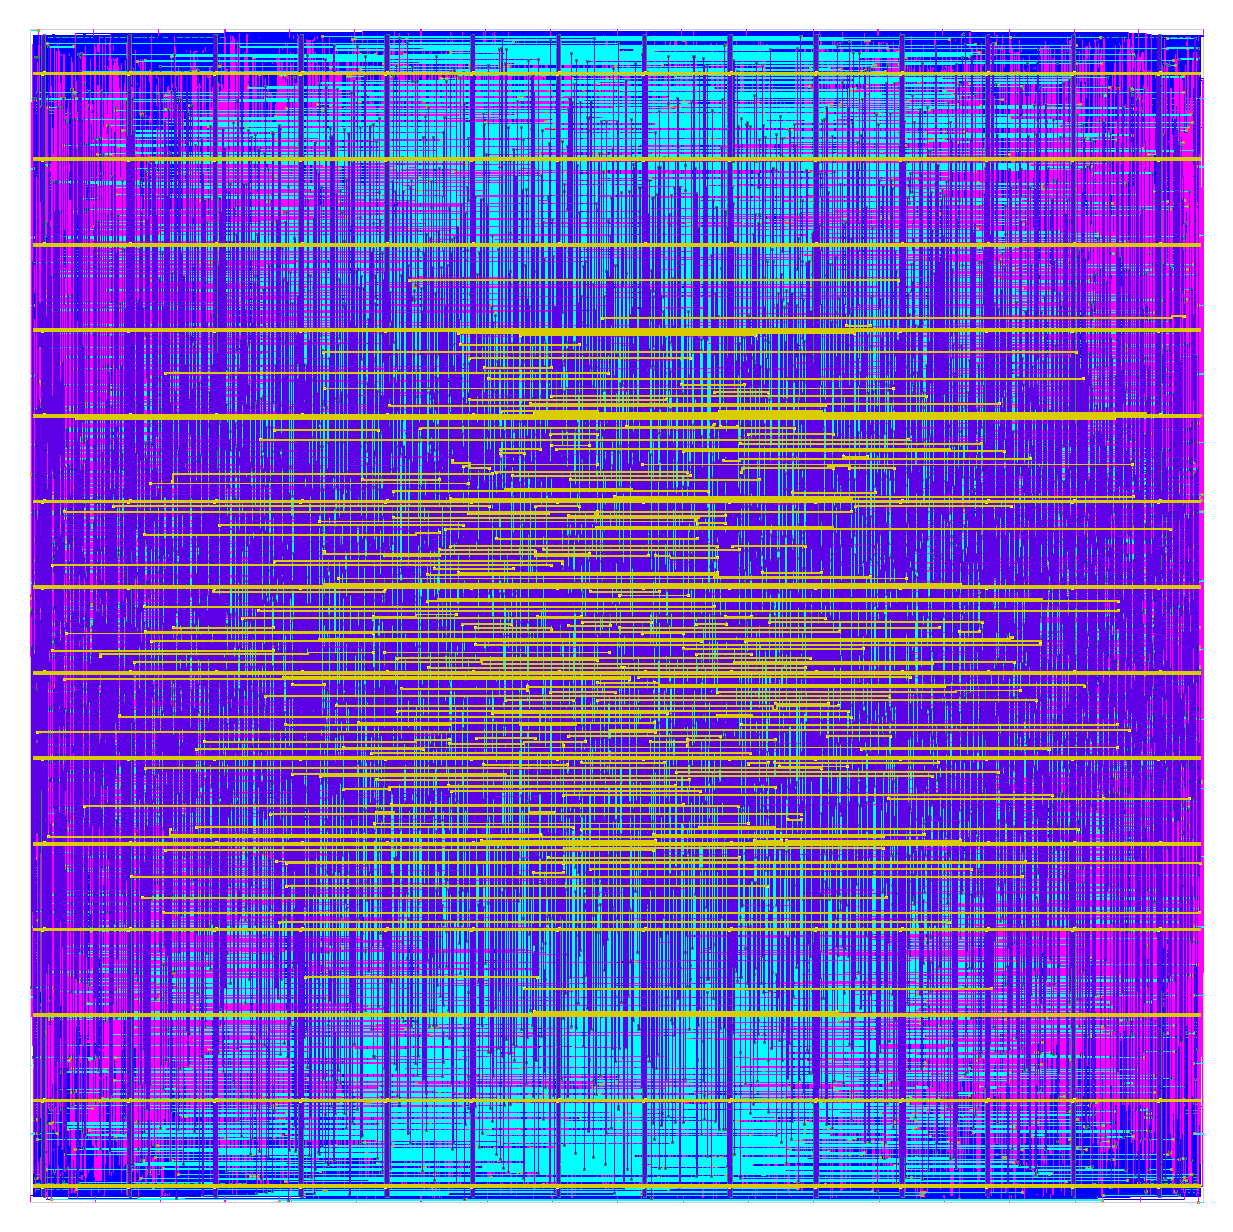